Mall Customer Segmentation - Complete Step-by-Step Notebook

🎯 STEP 1: SETUP ENVIRONMENT

    📦 Import Libraries (Code)

In [4]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine learning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Statistics
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuration
from IPython.display import display, HTML
import json
from datetime import datetime

# Set styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline
print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


📊 STEP 2: LOAD AND INSPECT DATA

    📥 Load Dataset (Code)

In [5]:
# Load the dataset
df = pd.read_csv('../data/raw/Mall_Customers.csv')

# Display basic information
print("📊 DATASET OVERVIEW")
print("=" * 50)
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage().sum() / 1024:.2f} KB")
print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

📊 DATASET OVERVIEW
Shape: 200 rows × 5 columns
Memory usage: 7.94 KB

Column names:
  1. CustomerID
  2. Genre
  3. Age
  4. Annual Income (k$)
  5. Spending Score (1-100)


🔍 Data Inspection (Markdown)

Objective: Understand the structure, data types, and completeness of the dataset.

        📋 Display Sample Data (Code)

In [6]:
# Display first 10 rows
print("📋 FIRST 10 ROWS OF DATA")
print("=" * 50)
display(df.head(10))

# Display last 5 rows
print("\n📋 LAST 5 ROWS OF DATA")
print("=" * 50)
display(df.tail())

📋 FIRST 10 ROWS OF DATA


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72



📋 LAST 5 ROWS OF DATA


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


        📊 Data Information (Code)

In [7]:
# Display data types and non-null counts
print("ℹ️ DATA INFORMATION")
print("=" * 50)
df.info()

# Display statistical summary
print("\n📈 STATISTICAL SUMMARY")
print("=" * 50)
display(df.describe().T.style.format("{:.2f}"))

# Check for missing values
print("\n🔍 MISSING VALUES CHECK")
print("=" * 50)
missing_data = df.isnull().sum()
if missing_data.sum() == 0:
    print("✅ No missing values found!")
else:
    for col, missing in missing_data.items():
        if missing > 0:
            print(f"❌ {col}: {missing} missing values ({missing/len(df)*100:.2f}%)")

# Check for duplicates
print("\n🔍 DUPLICATE CHECK")
print("=" * 50)
duplicates = df.duplicated().sum()
if duplicates == 0:
    print("✅ No duplicate rows found!")
else:
    print(f"⚠️ Found {duplicates} duplicate row(s)")

ℹ️ DATA INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

📈 STATISTICAL SUMMARY


,count,mean,std,min,25%,50%,75%,max
CustomerID,200.00,100.50,57.88,1.00,50.75,100.50,150.25,200.00
Age,200.00,38.85,13.97,18.00,28.75,36.00,49.00,70.00
Annual Income (k$),200.00,60.56,26.26,15.00,41.50,61.50,78.00,137.00
Spending Score (1-100),200.00,50.20,25.82,1.00,34.75,50.00,73.00,99.00



🔍 MISSING VALUES CHECK
✅ No missing values found!

🔍 DUPLICATE CHECK
✅ No duplicate rows found!


🔍 STEP 3: EXPLORATORY DATA ANALYSIS (EDA)

📈 Univariate Analysis (Markdown)

Objective: Analyze each variable individually to understand its distribution and characteristics.



    📊 Gender Distribution (Code)

👥 GENDER DISTRIBUTION


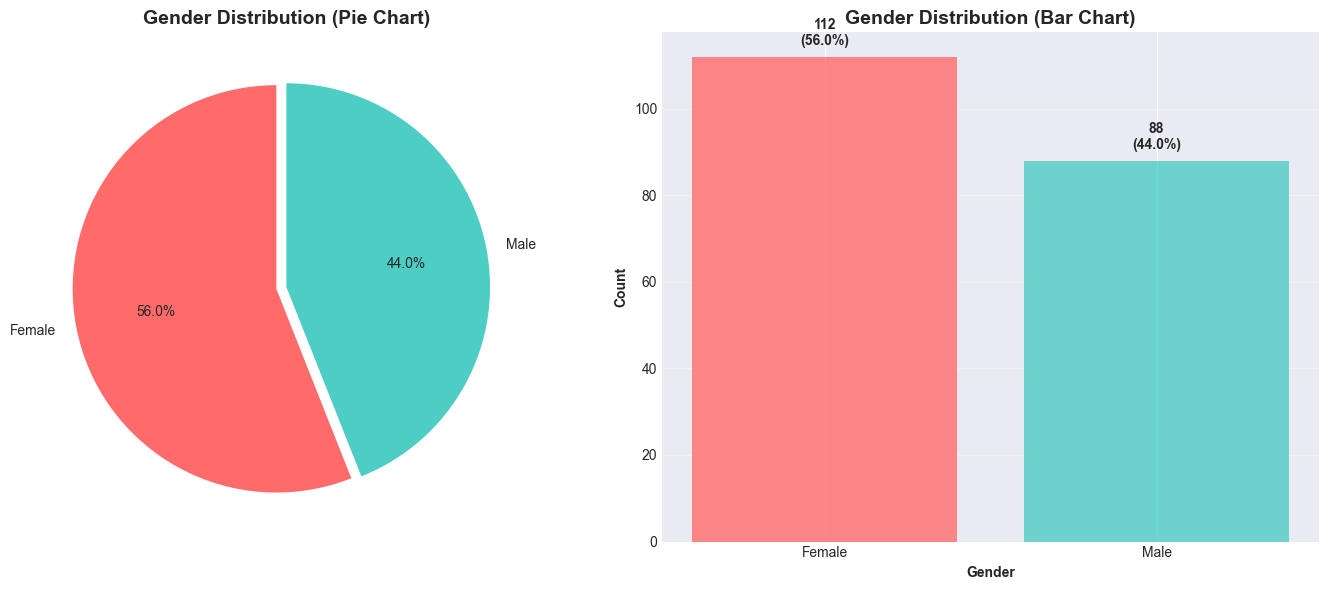

,Count,Percentage
Genre,,
Female,112,56.0
Male,88,44.0


In [ ]:
print("👥 GENDER DISTRIBUTION")
print("=" * 50)

# Calculate gender statistics
gender_counts = df['Genre'].value_counts()
gender_percent = df['Genre'].value_counts(normalize=True) * 100

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
colors = ['#FF6B6B', '#4ECDC4']
ax1.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, explode=(0.05, 0))
ax1.set_title('Gender Distribution (Pie Chart)', fontsize=14, fontweight='bold')

# Bar chart
bars = ax2.bar(gender_counts.index, gender_counts.values, color=colors, alpha=0.8)
ax2.set_xlabel('Gender', fontweight='bold')
ax2.set_ylabel('Count', fontweight='bold')
ax2.set_title('Gender Distribution (Bar Chart)', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add count labels on bars
for idx, (bar, count) in enumerate(zip(bars, gender_counts.values)):
    percentage = gender_percent.iloc[idx]
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
            f'{count}\n({percentage:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Display statistics
gender_stats = pd.DataFrame({
    'Count': gender_counts,
    'Percentage': gender_percent.round(2)
})
display(gender_stats)

    📊 Age Distribution Analysis (Code)

🎂 AGE DISTRIBUTION ANALYSIS


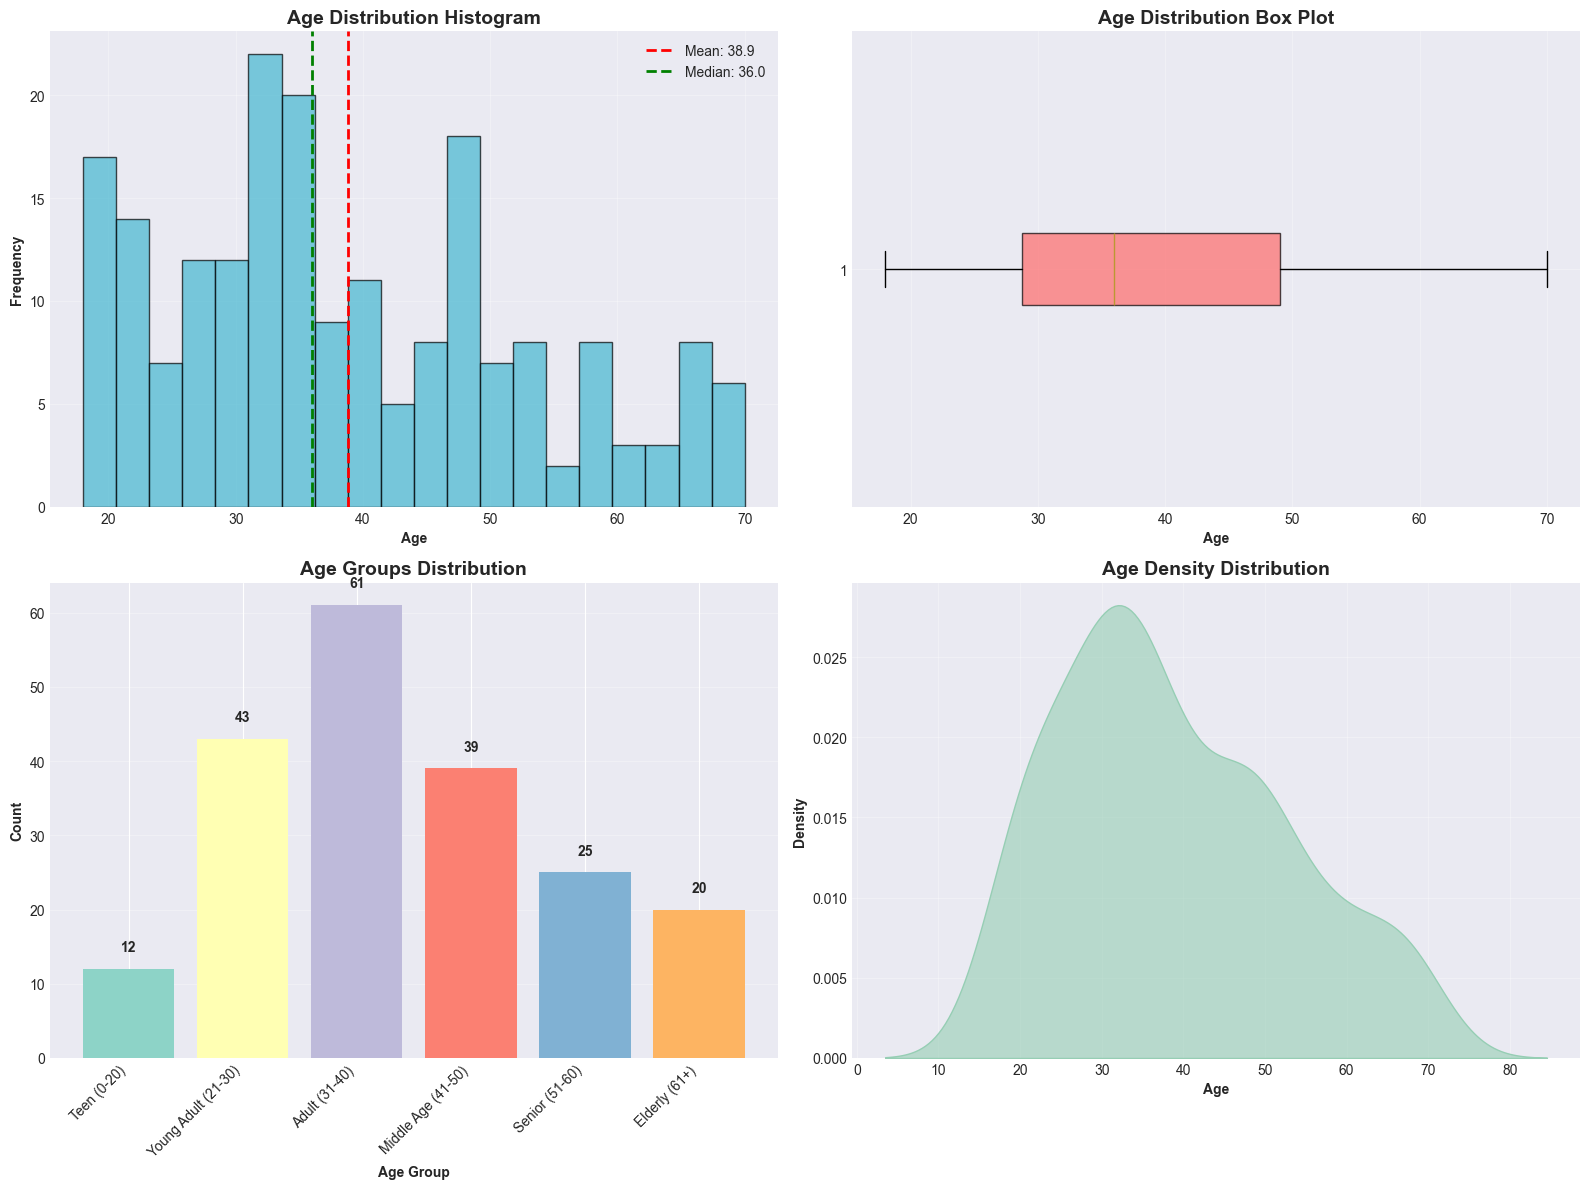


📊 AGE STATISTICS:
  Min Age: 18.00
  Max Age: 70.00
  Mean Age: 38.85
  Median Age: 36.00
  Std Dev: 13.97

👥 AGE GROUPS DISTRIBUTION:


,Count,Percentage
Age_Group,,
Teen (0-20),12,6.0
Young Adult (21-30),43,21.5
Adult (31-40),61,30.5
Middle Age (41-50),39,19.5
Senior (51-60),25,12.5
Elderly (61+),20,10.0


In [13]:
print("🎂 AGE DISTRIBUTION ANALYSIS")
print("=" * 50)

# Calculate age statistics
age_stats = {
    'Min Age': df['Age'].min(),
    'Max Age': df['Age'].max(),
    'Mean Age': df['Age'].mean(),
    'Median Age': df['Age'].median(),
    'Std Dev': df['Age'].std()
}

# Create age groups
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['Teen (0-20)', 'Young Adult (21-30)', 'Adult (31-40)', 
          'Middle Age (41-50)', 'Senior (51-60)', 'Elderly (61+)']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Histogram
ax1.hist(df['Age'], bins=20, color='#45B7D1', edgecolor='black', alpha=0.7)
ax1.axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {df["Age"].mean():.1f}')
ax1.axvline(df['Age'].median(), color='green', linestyle='--', linewidth=2, 
            label=f'Median: {df["Age"].median():.1f}')
ax1.set_xlabel('Age', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('Age Distribution Histogram', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plot
ax2.boxplot(df['Age'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='#FF6B6B', alpha=0.7))
ax2.set_xlabel('Age', fontweight='bold')
ax2.set_title('Age Distribution Box Plot', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Age groups distribution
age_group_counts = df['Age_Group'].value_counts().sort_index()
colors = plt.cm.Set3(np.arange(len(age_group_counts)))
bars = ax3.bar(range(len(age_group_counts)), age_group_counts.values, color=colors)
ax3.set_xlabel('Age Group', fontweight='bold')
ax3.set_ylabel('Count', fontweight='bold')
ax3.set_title('Age Groups Distribution', fontsize=14, fontweight='bold')
ax3.set_xticks(range(len(age_group_counts)))
ax3.set_xticklabels(age_group_counts.index, rotation=45, ha='right')
ax3.grid(axis='y', alpha=0.3)

# Add count labels on bars
for bar, count in zip(bars, age_group_counts.values):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
            str(count), ha='center', va='bottom', fontweight='bold')

# KDE plot
sns.kdeplot(data=df, x='Age', fill=True, color='#96CEB4', alpha=0.6, ax=ax4)
ax4.set_xlabel('Age', fontweight='bold')
ax4.set_ylabel('Density', fontweight='bold')
ax4.set_title('Age Density Distribution', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display statistics
print("\n📊 AGE STATISTICS:")
for stat, value in age_stats.items():
    print(f"  {stat}: {value:.2f}")

print("\n👥 AGE GROUPS DISTRIBUTION:")
age_group_summary = pd.DataFrame({
    'Count': age_group_counts,
    'Percentage': (age_group_counts / len(df) * 100).round(2)
})
display(age_group_summary)

    💰 Income Distribution Analysis (Code)

💰 ANNUAL INCOME DISTRIBUTION ANALYSIS


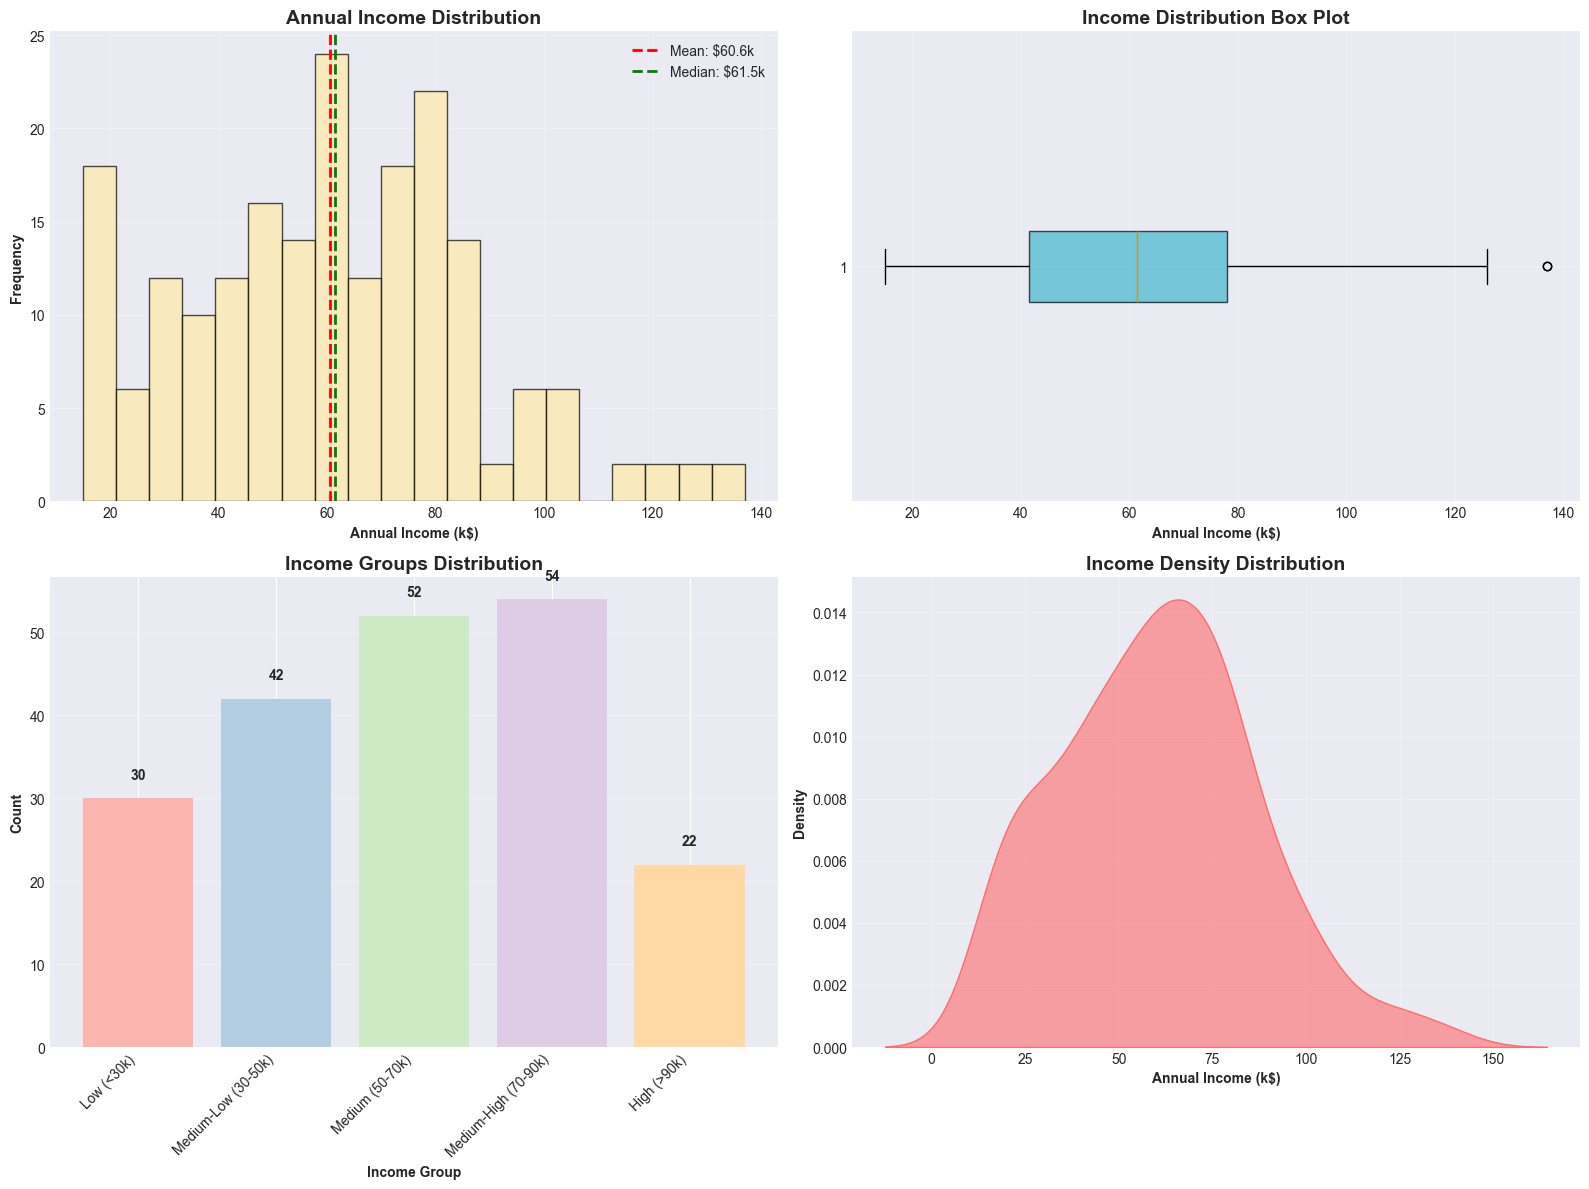


📊 INCOME STATISTICS:
  Min Income: $15.00k
  Max Income: $137.00k
  Mean Income: $60.56k
  Median Income: $61.50k
  Std Dev: $26.26k

💰 INCOME GROUPS DISTRIBUTION:


,Count,Percentage
Income_Group,,
Low (<30k),30,15.0
Medium-Low (30-50k),42,21.0
Medium (50-70k),52,26.0
Medium-High (70-90k),54,27.0
High (>90k),22,11.0


In [14]:
print("💰 ANNUAL INCOME DISTRIBUTION ANALYSIS")
print("=" * 50)

# Calculate income statistics
income_stats = {
    'Min Income': df['Annual Income (k$)'].min(),
    'Max Income': df['Annual Income (k$)'].max(),
    'Mean Income': df['Annual Income (k$)'].mean(),
    'Median Income': df['Annual Income (k$)'].median(),
    'Std Dev': df['Annual Income (k$)'].std()
}

# Create income groups
income_bins = [0, 30, 50, 70, 90, 150]
income_labels = ['Low (<30k)', 'Medium-Low (30-50k)', 'Medium (50-70k)', 
                 'Medium-High (70-90k)', 'High (>90k)']
df['Income_Group'] = pd.cut(df['Annual Income (k$)'], bins=income_bins, 
                           labels=income_labels, right=False)

# Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Histogram
ax1.hist(df['Annual Income (k$)'], bins=20, color='#FFEAA7', edgecolor='black', alpha=0.7)
ax1.axvline(df['Annual Income (k$)'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: ${df["Annual Income (k$)"].mean():.1f}k')
ax1.axvline(df['Annual Income (k$)'].median(), color='green', linestyle='--', linewidth=2, 
            label=f'Median: ${df["Annual Income (k$)"].median():.1f}k')
ax1.set_xlabel('Annual Income (k$)', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('Annual Income Distribution', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plot
ax2.boxplot(df['Annual Income (k$)'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='#45B7D1', alpha=0.7))
ax2.set_xlabel('Annual Income (k$)', fontweight='bold')
ax2.set_title('Income Distribution Box Plot', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Income groups distribution
income_group_counts = df['Income_Group'].value_counts().sort_index()
colors = plt.cm.Pastel1(np.arange(len(income_group_counts)))
bars = ax3.bar(range(len(income_group_counts)), income_group_counts.values, color=colors)
ax3.set_xlabel('Income Group', fontweight='bold')
ax3.set_ylabel('Count', fontweight='bold')
ax3.set_title('Income Groups Distribution', fontsize=14, fontweight='bold')
ax3.set_xticks(range(len(income_group_counts)))
ax3.set_xticklabels(income_group_counts.index, rotation=45, ha='right')
ax3.grid(axis='y', alpha=0.3)

# Add count labels on bars
for bar, count in zip(bars, income_group_counts.values):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
            str(count), ha='center', va='bottom', fontweight='bold')

# KDE plot
sns.kdeplot(data=df, x='Annual Income (k$)', fill=True, color='#FF6B6B', alpha=0.6, ax=ax4)
ax4.set_xlabel('Annual Income (k$)', fontweight='bold')
ax4.set_ylabel('Density', fontweight='bold')
ax4.set_title('Income Density Distribution', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display statistics
print("\n📊 INCOME STATISTICS:")
for stat, value in income_stats.items():
    print(f"  {stat}: ${value:.2f}k")

print("\n💰 INCOME GROUPS DISTRIBUTION:")
income_group_summary = pd.DataFrame({
    'Count': income_group_counts,
    'Percentage': (income_group_counts / len(df) * 100).round(2)
})
display(income_group_summary)

    🛍️ Spending Score Analysis (Code)

🛍️ SPENDING SCORE ANALYSIS


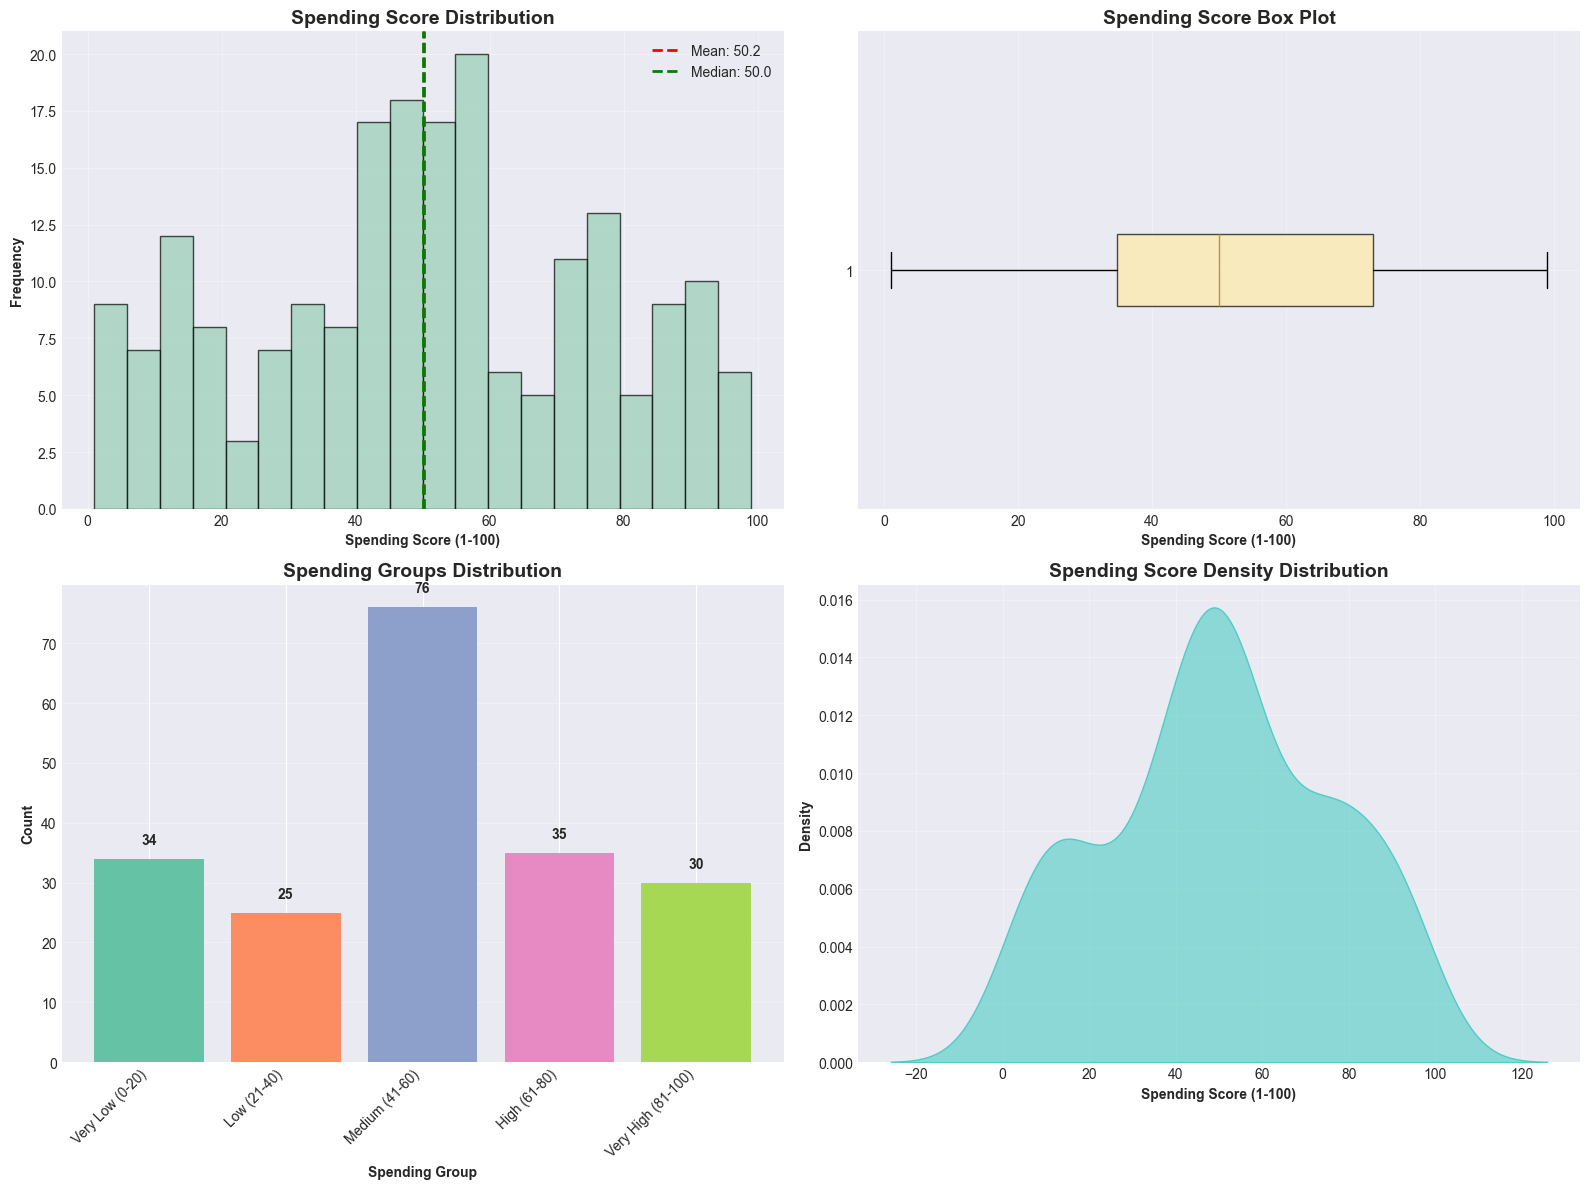


📊 SPENDING SCORE STATISTICS:
  Min Score: 1.00
  Max Score: 99.00
  Mean Score: 50.20
  Median Score: 50.00
  Std Dev: 25.82

🛍️ SPENDING GROUPS DISTRIBUTION:


,Count,Percentage
Spending_Group,,
Very Low (0-20),34,17.0
Low (21-40),25,12.5
Medium (41-60),76,38.0
High (61-80),35,17.5
Very High (81-100),30,15.0


In [15]:
print("🛍️ SPENDING SCORE ANALYSIS")
print("=" * 50)

# Calculate spending score statistics
spending_stats = {
    'Min Score': df['Spending Score (1-100)'].min(),
    'Max Score': df['Spending Score (1-100)'].max(),
    'Mean Score': df['Spending Score (1-100)'].mean(),
    'Median Score': df['Spending Score (1-100)'].median(),
    'Std Dev': df['Spending Score (1-100)'].std()
}

# Create spending score groups
score_bins = [0, 20, 40, 60, 80, 101]
score_labels = ['Very Low (0-20)', 'Low (21-40)', 'Medium (41-60)', 
                'High (61-80)', 'Very High (81-100)']
df['Spending_Group'] = pd.cut(df['Spending Score (1-100)'], bins=score_bins, 
                             labels=score_labels, right=False)

# Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Histogram
ax1.hist(df['Spending Score (1-100)'], bins=20, color='#96CEB4', edgecolor='black', alpha=0.7)
ax1.axvline(df['Spending Score (1-100)'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {df["Spending Score (1-100)"].mean():.1f}')
ax1.axvline(df['Spending Score (1-100)'].median(), color='green', linestyle='--', linewidth=2, 
            label=f'Median: {df["Spending Score (1-100)"].median():.1f}')
ax1.set_xlabel('Spending Score (1-100)', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('Spending Score Distribution', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plot
ax2.boxplot(df['Spending Score (1-100)'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='#FFEAA7', alpha=0.7))
ax2.set_xlabel('Spending Score (1-100)', fontweight='bold')
ax2.set_title('Spending Score Box Plot', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Spending groups distribution
spending_group_counts = df['Spending_Group'].value_counts().sort_index()
colors = plt.cm.Set2(np.arange(len(spending_group_counts)))
bars = ax3.bar(range(len(spending_group_counts)), spending_group_counts.values, color=colors)
ax3.set_xlabel('Spending Group', fontweight='bold')
ax3.set_ylabel('Count', fontweight='bold')
ax3.set_title('Spending Groups Distribution', fontsize=14, fontweight='bold')
ax3.set_xticks(range(len(spending_group_counts)))
ax3.set_xticklabels(spending_group_counts.index, rotation=45, ha='right')
ax3.grid(axis='y', alpha=0.3)

# Add count labels on bars
for bar, count in zip(bars, spending_group_counts.values):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
            str(count), ha='center', va='bottom', fontweight='bold')

# KDE plot
sns.kdeplot(data=df, x='Spending Score (1-100)', fill=True, color='#4ECDC4', alpha=0.6, ax=ax4)
ax4.set_xlabel('Spending Score (1-100)', fontweight='bold')
ax4.set_ylabel('Density', fontweight='bold')
ax4.set_title('Spending Score Density Distribution', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display statistics
print("\n📊 SPENDING SCORE STATISTICS:")
for stat, value in spending_stats.items():
    print(f"  {stat}: {value:.2f}")

print("\n🛍️ SPENDING GROUPS DISTRIBUTION:")
spending_group_summary = pd.DataFrame({
    'Count': spending_group_counts,
    'Percentage': (spending_group_counts / len(df) * 100).round(2)
})
display(spending_group_summary)

🔗 Bivariate Analysis (Markdown)

Objective: Analyze relationships between pairs of variables to identify patterns and correlations.

    📈 Correlation Analysis (Code)

🔗 CORRELATION ANALYSIS


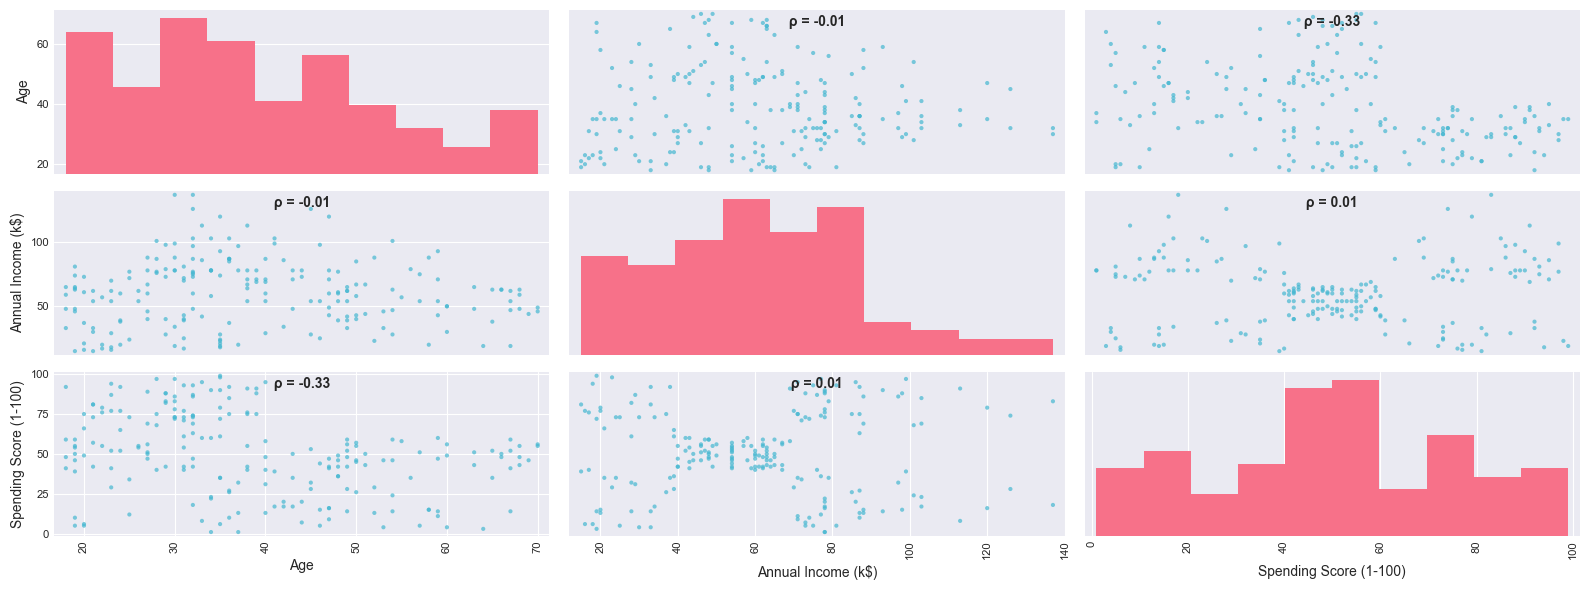


📊 CORRELATION MATRIX:


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000,-0.012,-0.327
Annual Income (k$),-0.012,1.000,0.010
Spending Score (1-100),-0.327,0.010,1.000



📈 STATISTICAL CORRELATION TESTS:

Age vs Annual Income (k$):
  Pearson Correlation: -0.012 (p-value: 0.8617)
  Spearman Correlation: 0.020 (p-value: 0.7812)
  Interpretation: weak negative correlation

Age vs Spending Score (1-100):
  Pearson Correlation: -0.327 (p-value: 0.0000)
  Spearman Correlation: -0.345 (p-value: 0.0000)
  Interpretation: moderate negative correlation

Annual Income (k$) vs Spending Score (1-100):
  Pearson Correlation: 0.010 (p-value: 0.8893)
  Spearman Correlation: 0.008 (p-value: 0.9123)
  Interpretation: weak positive correlation


In [16]:
print("🔗 CORRELATION ANALYSIS")
print("=" * 50)

# Select numerical columns
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
corr_matrix = df[numerical_cols].corr()

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap
im = ax1.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
ax1.set_xticks(range(len(numerical_cols)))
ax1.set_yticks(range(len(numerical_cols)))
ax1.set_xticklabels(numerical_cols)
ax1.set_yticklabels(numerical_cols)
ax1.set_title('Correlation Heatmap', fontsize=14, fontweight='bold')

# Add correlation values to heatmap
for i in range(len(numerical_cols)):
    for j in range(len(numerical_cols)):
        text = ax1.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black", fontweight='bold')

plt.colorbar(im, ax=ax1)

# Scatter plot matrix
scatter_matrix = pd.plotting.scatter_matrix(df[numerical_cols], figsize=(12, 12), 
                                           diagonal='hist', alpha=0.7,
                                           color='#45B7D1', ax=ax2)

# Add correlation values to scatter matrix
for i, ax in enumerate(scatter_matrix.ravel()):
    if i % len(numerical_cols) != i // len(numerical_cols):
        row = i // len(numerical_cols)
        col = i % len(numerical_cols)
        corr_value = corr_matrix.iloc[row, col]
        ax.text(0.5, 0.9, f'ρ = {corr_value:.2f}', 
                transform=ax.transAxes, ha='center', fontweight='bold')

ax2.set_title('Scatter Matrix Plot', fontsize=14, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

# Display correlation matrix
print("\n📊 CORRELATION MATRIX:")
display(corr_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1).format("{:.3f}"))

# Statistical correlation test
print("\n📈 STATISTICAL CORRELATION TESTS:")
for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        col1, col2 = numerical_cols[i], numerical_cols[j]
        pearson_corr, pearson_p = stats.pearsonr(df[col1], df[col2])
        spearman_corr, spearman_p = stats.spearmanr(df[col1], df[col2])
        
        print(f"\n{col1} vs {col2}:")
        print(f"  Pearson Correlation: {pearson_corr:.3f} (p-value: {pearson_p:.4f})")
        print(f"  Spearman Correlation: {spearman_corr:.3f} (p-value: {spearman_p:.4f})")
        
        # Interpretation
        if abs(pearson_corr) > 0.7:
            strength = "strong"
        elif abs(pearson_corr) > 0.3:
            strength = "moderate"
        else:
            strength = "weak"
        
        if pearson_corr > 0:
            direction = "positive"
        else:
            direction = "negative"
            
        print(f"  Interpretation: {strength} {direction} correlation")

    📊 Gender vs Other Variables (Code)

👥 GENDER COMPARISON ANALYSIS


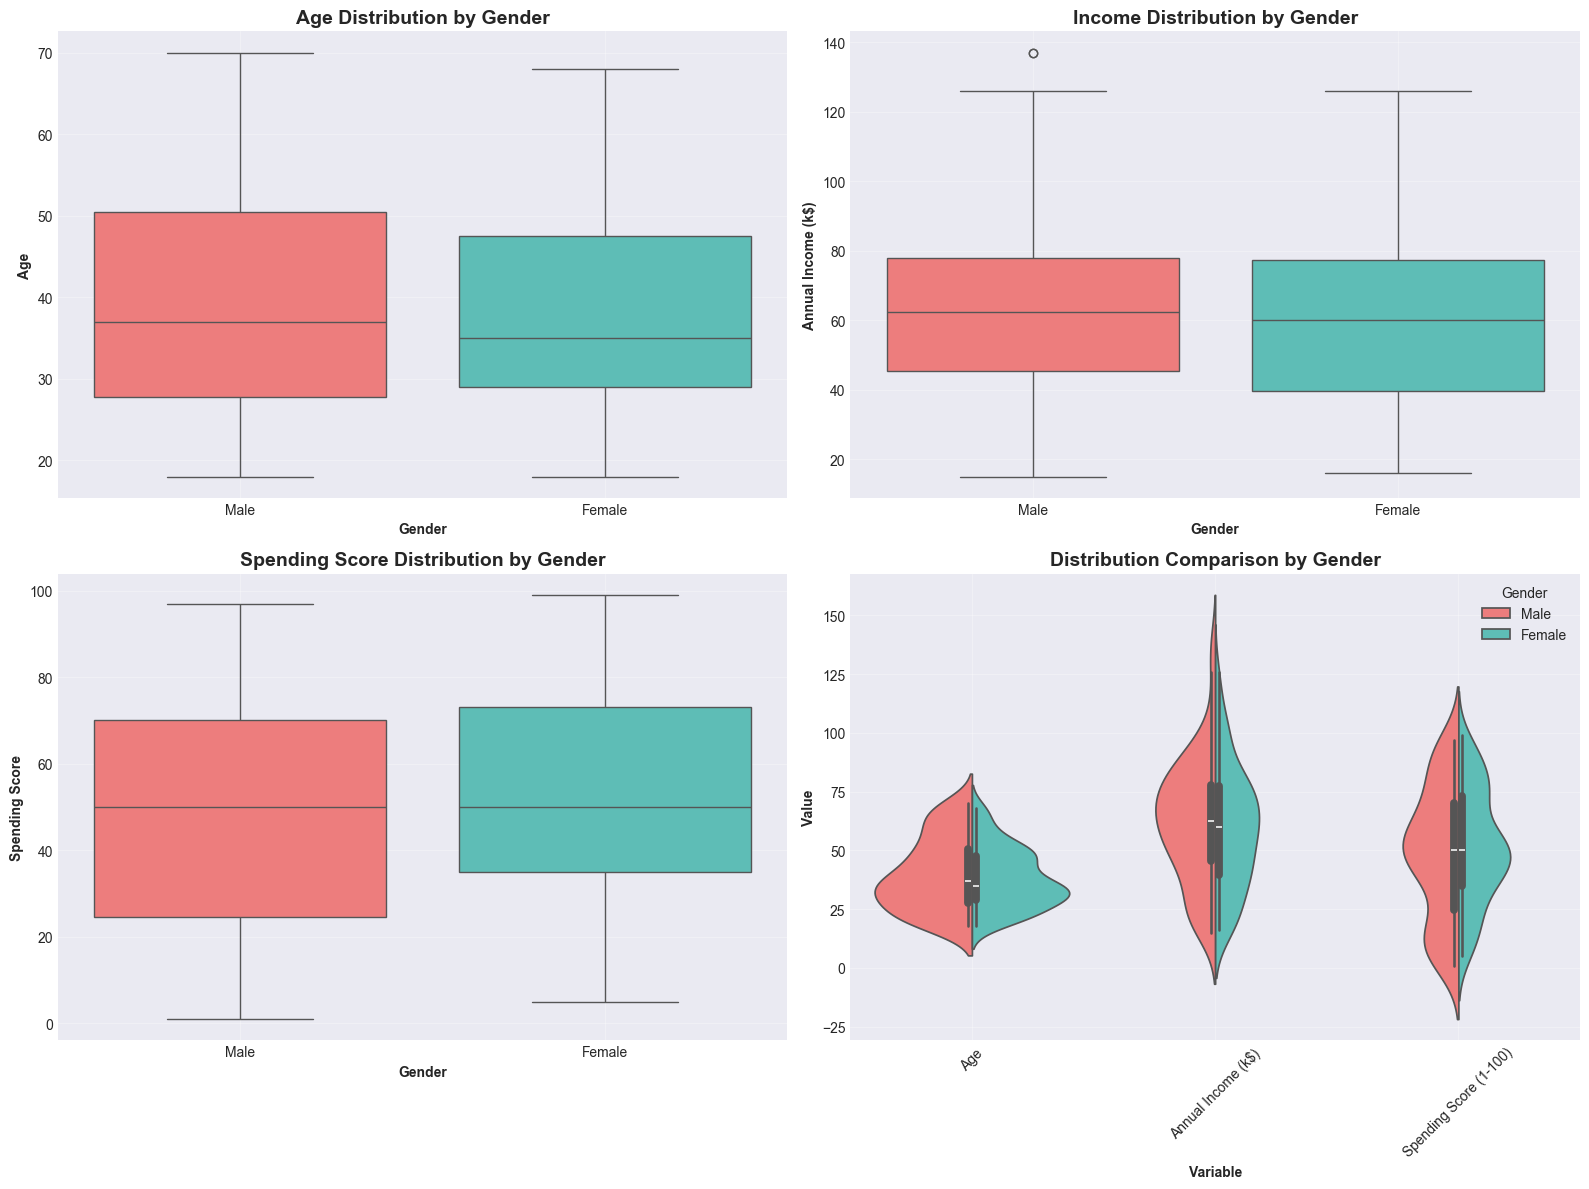


📊 STATISTICAL COMPARISON BY GENDER:

Age:
  Male (N=88): Mean = 39.81, Std = 15.51
  Female (N=112): Mean = 38.10, Std = 12.64
  T-test: t = 0.837, p-value = 0.4036
  Result: No statistically significant difference

Annual Income (k$):
  Male (N=88): Mean = 62.23, Std = 26.64
  Female (N=112): Mean = 59.25, Std = 26.01
  T-test: t = 0.793, p-value = 0.4289
  Result: No statistically significant difference

Spending Score (1-100):
  Male (N=88): Mean = 48.51, Std = 27.90
  Female (N=112): Mean = 51.53, Std = 24.11
  T-test: t = -0.805, p-value = 0.4220
  Result: No statistically significant difference


In [17]:
print("👥 GENDER COMPARISON ANALYSIS")
print("=" * 50)

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Boxplot: Age by Gender
sns.boxplot(data=df, x='Genre', y='Age', palette=['#FF6B6B', '#4ECDC4'], ax=axes[0,0])
axes[0,0].set_xlabel('Gender', fontweight='bold')
axes[0,0].set_ylabel('Age', fontweight='bold')
axes[0,0].set_title('Age Distribution by Gender', fontsize=14, fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# Boxplot: Income by Gender
sns.boxplot(data=df, x='Genre', y='Annual Income (k$)', palette=['#FF6B6B', '#4ECDC4'], ax=axes[0,1])
axes[0,1].set_xlabel('Gender', fontweight='bold')
axes[0,1].set_ylabel('Annual Income (k$)', fontweight='bold')
axes[0,1].set_title('Income Distribution by Gender', fontsize=14, fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# Boxplot: Spending Score by Gender
sns.boxplot(data=df, x='Genre', y='Spending Score (1-100)', palette=['#FF6B6B', '#4ECDC4'], ax=axes[1,0])
axes[1,0].set_xlabel('Gender', fontweight='bold')
axes[1,0].set_ylabel('Spending Score', fontweight='bold')
axes[1,0].set_title('Spending Score Distribution by Gender', fontsize=14, fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# Violin plot: All variables by Gender
sns.violinplot(data=df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].melt(id_vars='Genre'),
              x='variable', y='value', hue='Genre', split=True, 
              palette=['#FF6B6B', '#4ECDC4'], ax=axes[1,1])
axes[1,1].set_xlabel('Variable', fontweight='bold')
axes[1,1].set_ylabel('Value', fontweight='bold')
axes[1,1].set_title('Distribution Comparison by Gender', fontsize=14, fontweight='bold')
axes[1,1].legend(title='Gender')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Statistical comparison by gender
print("\n📊 STATISTICAL COMPARISON BY GENDER:")
for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    male_data = df[df['Genre'] == 'Male'][col]
    female_data = df[df['Genre'] == 'Female'][col]
    
    t_stat, p_value = stats.ttest_ind(male_data, female_data, equal_var=False)
    
    print(f"\n{col}:")
    print(f"  Male (N={len(male_data)}): Mean = {male_data.mean():.2f}, Std = {male_data.std():.2f}")
    print(f"  Female (N={len(female_data)}): Mean = {female_data.mean():.2f}, Std = {female_data.std():.2f}")
    print(f"  T-test: t = {t_stat:.3f}, p-value = {p_value:.4f}")
    
    if p_value < 0.05:
        print(f"  Result: Statistically significant difference (p < 0.05)")
        if male_data.mean() > female_data.mean():
            print(f"  Insight: Males have significantly higher {col.lower()}")
        else:
            print(f"  Insight: Females have significantly higher {col.lower()}")
    else:
        print(f"  Result: No statistically significant difference")

    📊 Age vs Spending Score Analysis (Code)

🎂🛍️ AGE vs SPENDING SCORE ANALYSIS


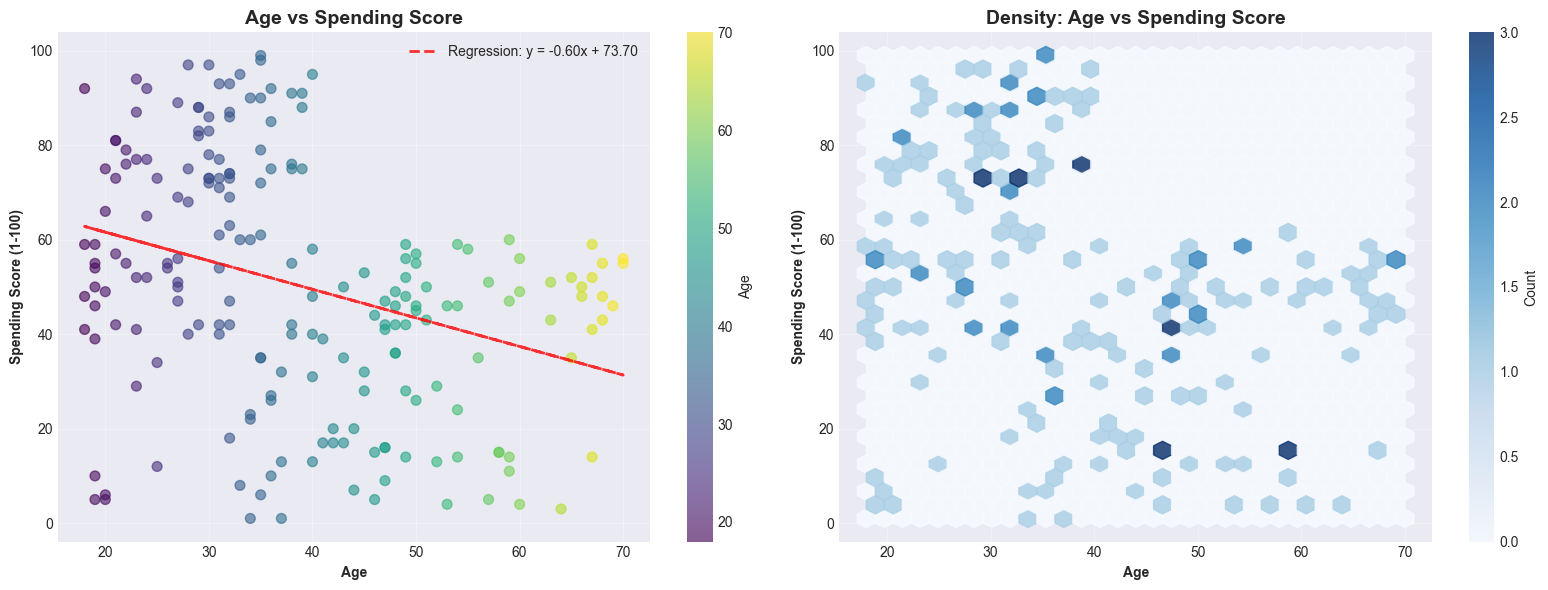


📊 Correlation between Age and Spending Score: -0.327

🛍️ SPENDING SCORE BY AGE GROUP:


,mean,median,std,count
Age_Group,,,,
Teen (0-20),46.50,49.0,22.70,12
Young Adult (21-30),61.95,66.0,23.20,43
Adult (31-40),61.10,72.0,28.30,61
Middle Age (41-50),34.95,36.0,18.53,39
Senior (51-60),34.72,43.0,18.94,25
Elderly (61+),43.00,48.5,16.67,20


In [18]:
print("🎂🛍️ AGE vs SPENDING SCORE ANALYSIS")
print("=" * 50)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot with regression line
scatter = ax1.scatter(df['Age'], df['Spending Score (1-100)'], 
                     c=df['Age'], cmap='viridis', alpha=0.6, s=50)
ax1.set_xlabel('Age', fontweight='bold')
ax1.set_ylabel('Spending Score (1-100)', fontweight='bold')
ax1.set_title('Age vs Spending Score', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Add regression line
z = np.polyfit(df['Age'], df['Spending Score (1-100)'], 1)
p = np.poly1d(z)
ax1.plot(df['Age'], p(df['Age']), "r--", alpha=0.8, linewidth=2, 
         label=f'Regression: y = {z[0]:.2f}x + {z[1]:.2f}')
ax1.legend()

plt.colorbar(scatter, ax=ax1, label='Age')

# Hexbin plot for density visualization
hb = ax2.hexbin(df['Age'], df['Spending Score (1-100)'], gridsize=30, cmap='Blues', alpha=0.8)
ax2.set_xlabel('Age', fontweight='bold')
ax2.set_ylabel('Spending Score (1-100)', fontweight='bold')
ax2.set_title('Density: Age vs Spending Score', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.colorbar(hb, ax=ax2, label='Count')

plt.tight_layout()
plt.show()

# Calculate correlation
corr_age_spending = df['Age'].corr(df['Spending Score (1-100)'])
print(f"\n📊 Correlation between Age and Spending Score: {corr_age_spending:.3f}")

# Age groups spending analysis
print("\n🛍️ SPENDING SCORE BY AGE GROUP:")
age_spending_stats = df.groupby('Age_Group')['Spending Score (1-100)'].agg(['mean', 'median', 'std', 'count'])
age_spending_stats['mean'] = age_spending_stats['mean'].round(2)
age_spending_stats['median'] = age_spending_stats['median'].round(2)
age_spending_stats['std'] = age_spending_stats['std'].round(2)
display(age_spending_stats)

    💰 Income vs Spending Score Analysis (Code)

💰🛍️ INCOME vs SPENDING SCORE ANALYSIS


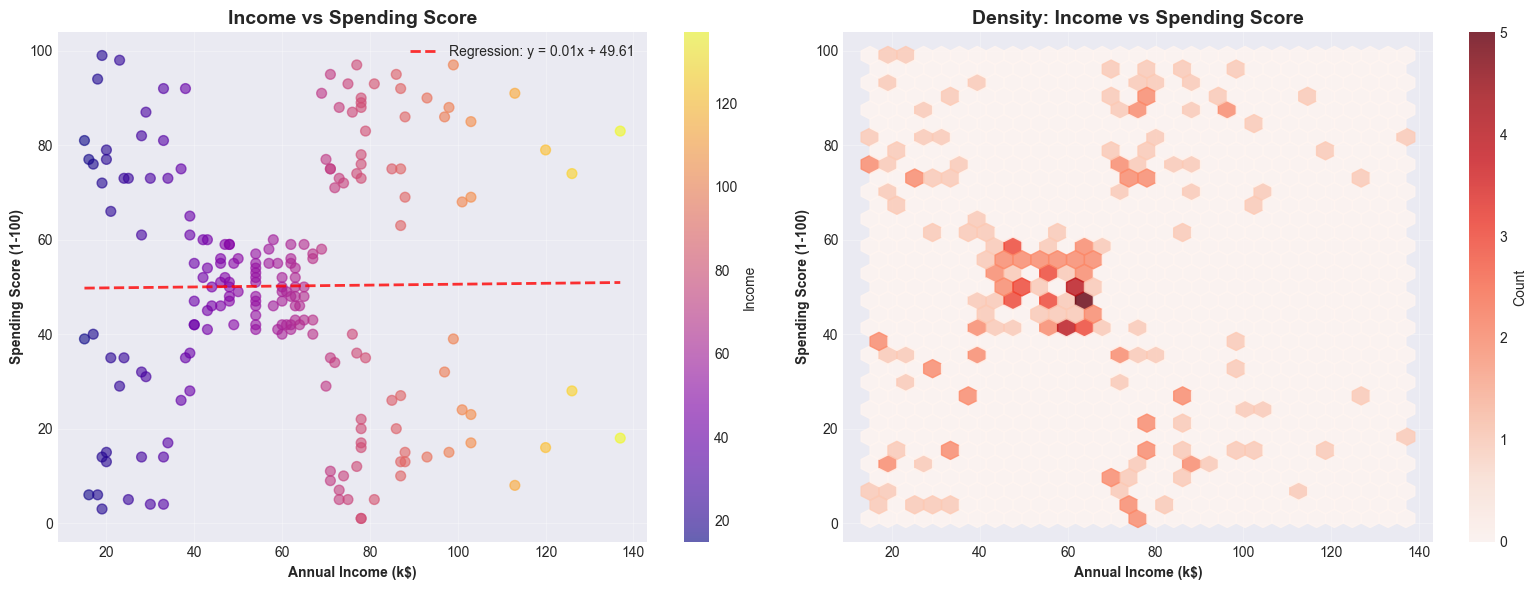


📊 Correlation between Income and Spending Score: 0.010

🛍️ SPENDING SCORE BY INCOME GROUP:


,mean,median,std,count
Income_Group,,,,
Low (<30k),50.40,50.5,32.15,30
Medium-Low (30-50k),50.00,51.0,19.47,42
Medium (50-70k),50.15,49.0,8.26,52
Medium-High (70-90k),49.56,51.5,33.97,54
High (>90k),52.00,53.5,32.69,22


In [19]:
print("💰🛍️ INCOME vs SPENDING SCORE ANALYSIS")
print("=" * 50)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot with regression line
scatter = ax1.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                     c=df['Annual Income (k$)'], cmap='plasma', alpha=0.6, s=50)
ax1.set_xlabel('Annual Income (k$)', fontweight='bold')
ax1.set_ylabel('Spending Score (1-100)', fontweight='bold')
ax1.set_title('Income vs Spending Score', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Add regression line
z = np.polyfit(df['Annual Income (k$)'], df['Spending Score (1-100)'], 1)
p = np.poly1d(z)
ax1.plot(df['Annual Income (k$)'], p(df['Annual Income (k$)']), "r--", alpha=0.8, linewidth=2, 
         label=f'Regression: y = {z[0]:.2f}x + {z[1]:.2f}')
ax1.legend()

plt.colorbar(scatter, ax=ax1, label='Income')

# Hexbin plot for density visualization
hb = ax2.hexbin(df['Annual Income (k$)'], df['Spending Score (1-100)'], gridsize=30, cmap='Reds', alpha=0.8)
ax2.set_xlabel('Annual Income (k$)', fontweight='bold')
ax2.set_ylabel('Spending Score (1-100)', fontweight='bold')
ax2.set_title('Density: Income vs Spending Score', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.colorbar(hb, ax=ax2, label='Count')

plt.tight_layout()
plt.show()

# Calculate correlation
corr_income_spending = df['Annual Income (k$)'].corr(df['Spending Score (1-100)'])
print(f"\n📊 Correlation between Income and Spending Score: {corr_income_spending:.3f}")

# Income groups spending analysis
print("\n🛍️ SPENDING SCORE BY INCOME GROUP:")
income_spending_stats = df.groupby('Income_Group')['Spending Score (1-100)'].agg(['mean', 'median', 'std', 'count'])
income_spending_stats['mean'] = income_spending_stats['mean'].round(2)
income_spending_stats['median'] = income_spending_stats['median'].round(2)
income_spending_stats['std'] = income_spending_stats['std'].round(2)
display(income_spending_stats)

🔄 STEP 4: DATA PREPROCESSING

⚙️ Feature Engineering & Preparation (Markdown)

Objective: Prepare data for clustering by encoding categorical variables and scaling numerical features.

🔧 Data Preprocessing (Code)

In [21]:
print("🔄 DATA PREPROCESSING")
print("=" * 50)

# Create a copy of the dataframe for preprocessing
df_preprocessed = df.copy()

# Display original data
print("📋 ORIGINAL DATA (First 5 rows):")
display(df_preprocessed.head())

# 1. Handle categorical variable (Genre)
print("\n1️⃣ ENCODING CATEGORICAL VARIABLE (Genre)")
le = LabelEncoder()
df_preprocessed['Genre_encoded'] = le.fit_transform(df_preprocessed['Genre'])
print(f"   Encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# 2. Select features for clustering
print("\n2️⃣ SELECTING FEATURES FOR CLUSTERING")
features_for_clustering = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df_preprocessed[features_for_clustering].copy()
print(f"   Selected features: {features_for_clustering}")
print(f"   Shape of feature matrix: {X.shape}")

# 3. Feature scaling
print("\n3️⃣ SCALING FEATURES (Standardization)")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering)

print("   Scaling parameters:")
for i, col in enumerate(features_for_clustering):
    print(f"   {col}: Mean = {scaler.mean_[i]:.2f}, Std = {scaler.scale_[i]:.2f}")

# 4. Check scaled data
print("\n4️⃣ SCALED DATA STATISTICS:")
scaled_stats = pd.DataFrame({
    'Feature': features_for_clustering,
    'Original Mean': X.mean().values,
    'Scaled Mean': X_scaled_df.mean().values.round(6),
    'Original Std': X.std().values,
    'Scaled Std': X_scaled_df.std().values.round(6)
})
display(scaled_stats)

print("\n📋 SCALED DATA (First 5 rows):")
display(X_scaled_df.head())

# Save preprocessing objects for later use
import joblib
joblib.dump(scaler, '../models/scaler.pkl')
joblib.dump(le, '../models/label_encoder.pkl')
print("\n💾 Preprocessing objects saved to ../models/")

print("\n✅ DATA PREPROCESSING COMPLETED!")

🔄 DATA PREPROCESSING
📋 ORIGINAL DATA (First 5 rows):


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Income_Group,Spending_Group
0,1,Male,19,15,39,Teen (0-20),Low (<30k),Low (21-40)
1,2,Male,21,15,81,Young Adult (21-30),Low (<30k),Very High (81-100)
2,3,Female,20,16,6,Young Adult (21-30),Low (<30k),Very Low (0-20)
3,4,Female,23,16,77,Young Adult (21-30),Low (<30k),High (61-80)
4,5,Female,31,17,40,Adult (31-40),Low (<30k),Medium (41-60)



1️⃣ ENCODING CATEGORICAL VARIABLE (Genre)
   Encoding: {'Female': np.int64(0), 'Male': np.int64(1)}

2️⃣ SELECTING FEATURES FOR CLUSTERING
   Selected features: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
   Shape of feature matrix: (200, 3)

3️⃣ SCALING FEATURES (Standardization)
   Scaling parameters:
   Age: Mean = 38.85, Std = 13.93
   Annual Income (k$): Mean = 60.56, Std = 26.20
   Spending Score (1-100): Mean = 50.20, Std = 25.76

4️⃣ SCALED DATA STATISTICS:


,Feature,Original Mean,Scaled Mean,Original Std,Scaled Std
0,Age,38.85,-0.0,13.969007,1.002509
1,Annual Income (k$),60.56,-0.0,26.264721,1.002509
2,Spending Score (1-100),50.20,-0.0,25.823522,1.002509



📋 SCALED DATA (First 5 rows):


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980



💾 Preprocessing objects saved to ../models/

✅ DATA PREPROCESSING COMPLETED!


🎯 STEP 5: CLUSTERING WITH K-MEANS

🔍 Determine Optimal Number of Clusters (Markdown)

Objective: Use the Elbow Method and Silhouette Analysis to find the optimal number of clusters.

    📊 Elbow Method & Silhouette Analysis (Code)

🎯 DETERMINING OPTIMAL NUMBER OF CLUSTERS
Testing k values from 2 to 10...
  k=2: WCSS = 389.39, Silhouette = 0.335
  k=3: WCSS = 295.21, Silhouette = 0.358
  k=4: WCSS = 205.23, Silhouette = 0.404
  k=5: WCSS = 168.25, Silhouette = 0.417
  k=6: WCSS = 133.87, Silhouette = 0.428
  k=7: WCSS = 117.01, Silhouette = 0.417
  k=8: WCSS = 103.87, Silhouette = 0.408
  k=9: WCSS = 93.09, Silhouette = 0.418
  k=10: WCSS = 82.39, Silhouette = 0.407

📊 OPTIMAL K RECOMMENDATIONS:
  Elbow Method: k = 9
  Silhouette Score: k = 6 (Score: 0.428)
  Calinski-Harabasz Index: k = 6 (Score: 135.10)
  Davies-Bouldin Index: k = 7 (Score: 0.793)

🎯 SELECTED OPTIMAL K: 6


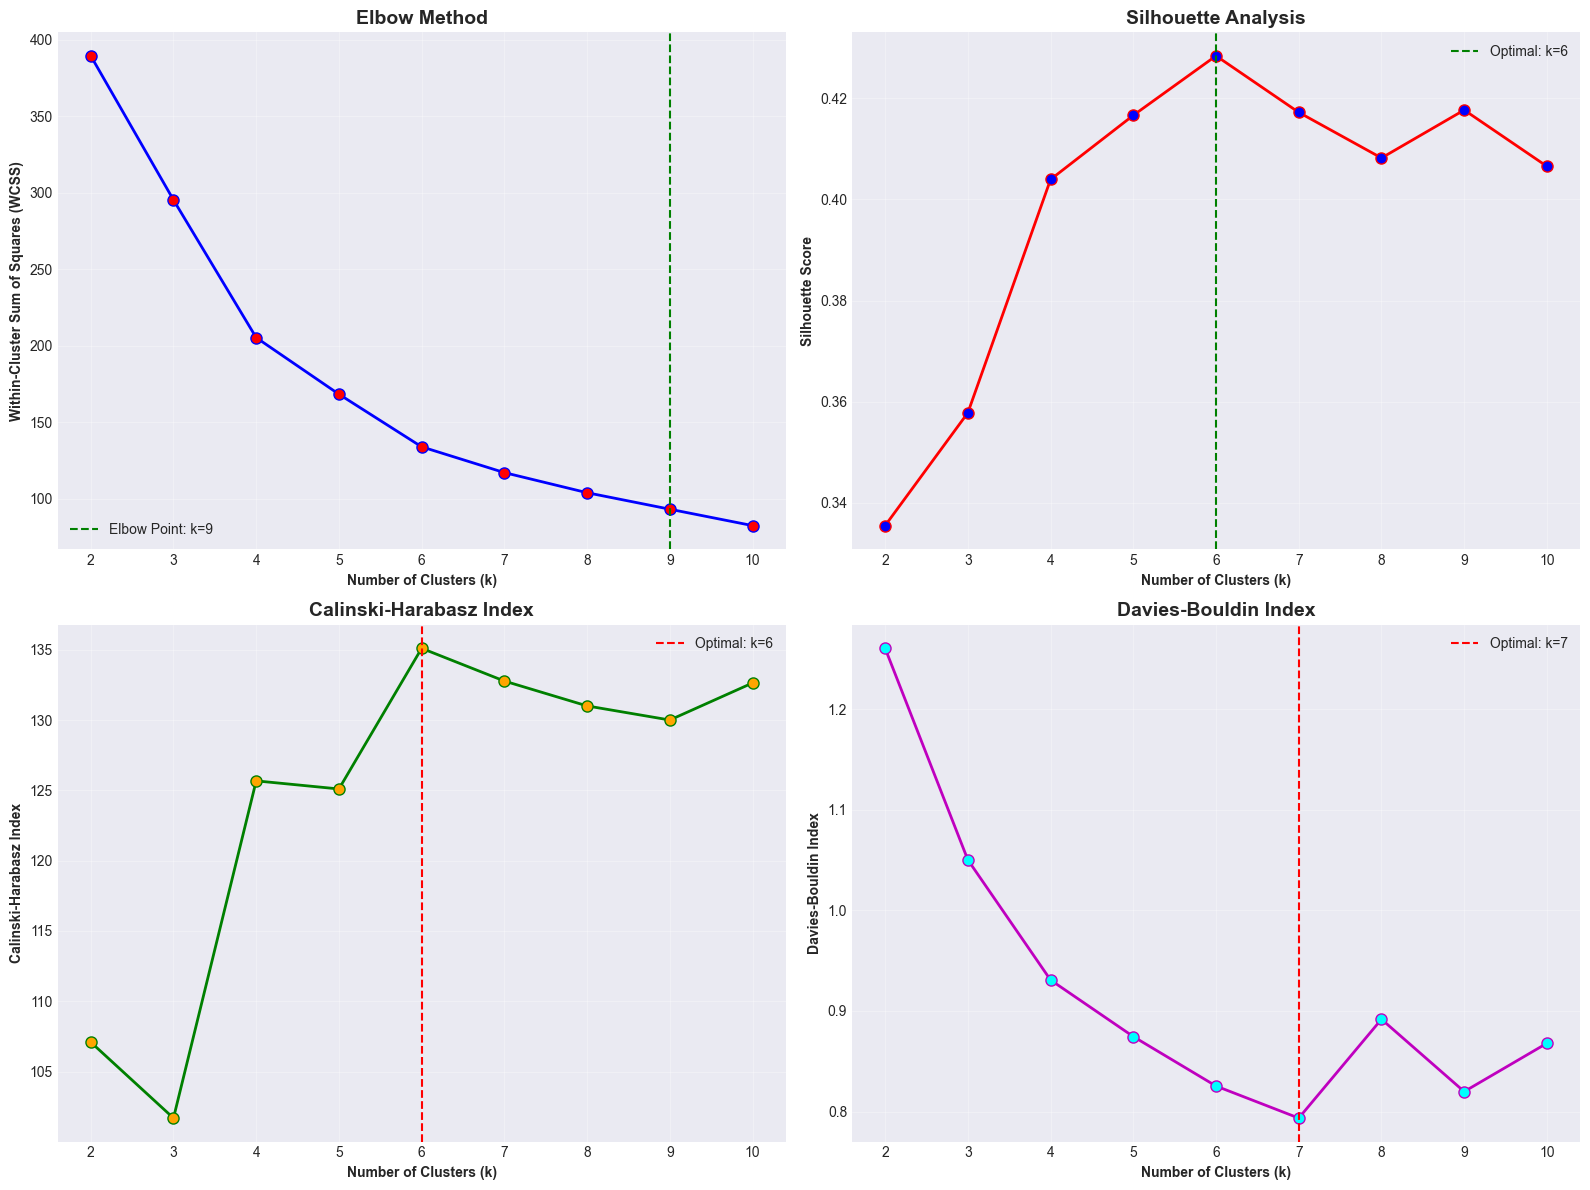

✅ OPTIMAL K ANALYSIS COMPLETED!


In [ ]:
print("🎯 DETERMINING OPTIMAL NUMBER OF CLUSTERS")
print("=" * 50)

# Define range of k values to test
k_range = range(2, 11)
wcss = []  # Within-Cluster Sum of Squares
silhouette_scores = []
calinski_scores = []
davies_scores = []

print(f"Testing k values from {min(k_range)} to {max(k_range)}...")

# Calculate metrics for each k
for k in k_range:
    # Fit K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    
    # Calculate metrics
    wcss.append(kmeans.inertia_)
    
    if k > 1:  # Silhouette score requires at least 2 clusters
        silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
        
        calinski = calinski_harabasz_score(X_scaled, kmeans.labels_)
        calinski_scores.append(calinski)
        
        davies = davies_bouldin_score(X_scaled, kmeans.labels_)
        davies_scores.append(davies)
    
    print(f"  k={k}: WCSS = {kmeans.inertia_:.2f}, ", end="")
    if k > 1:
        print(f"Silhouette = {silhouette_avg:.3f}")

# Find optimal k based on different criteria
optimal_k_elbow = k_range[np.argmin(np.diff(wcss, 2)) + 1] if len(wcss) > 2 else 3
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
optimal_k_calinski = k_range[np.argmax(calinski_scores)]
optimal_k_davies = k_range[np.argmin(davies_scores)]

print("\n📊 OPTIMAL K RECOMMENDATIONS:")
print(f"  Elbow Method: k = {optimal_k_elbow}")
print(f"  Silhouette Score: k = {optimal_k_silhouette} (Score: {max(silhouette_scores):.3f})")
print(f"  Calinski-Harabasz Index: k = {optimal_k_calinski} (Score: {max(calinski_scores):.2f})")
print(f"  Davies-Bouldin Index: k = {optimal_k_davies} (Score: {min(davies_scores):.3f})")

# Choose the most recommended k
optimal_k = optimal_k_silhouette  # Using silhouette as primary criterion
print(f"\n🎯 SELECTED OPTIMAL K: {optimal_k}")

# Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Elbow Method
ax1.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8, markerfacecolor='red')
ax1.set_xlabel('Number of Clusters (k)', fontweight='bold')
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)', fontweight='bold')
ax1.set_title('Elbow Method', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axvline(x=optimal_k_elbow, color='green', linestyle='--', 
            label=f'Elbow Point: k={optimal_k_elbow}')
ax1.legend()

# Silhouette Scores
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8, markerfacecolor='blue')
ax2.set_xlabel('Number of Clusters (k)', fontweight='bold')
ax2.set_ylabel('Silhouette Score', fontweight='bold')
ax2.set_title('Silhouette Analysis', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axvline(x=optimal_k_silhouette, color='green', linestyle='--', 
            label=f'Optimal: k={optimal_k_silhouette}')
ax2.legend()

# Calinski-Harabasz Index
ax3.plot(k_range, calinski_scores, 'go-', linewidth=2, markersize=8, markerfacecolor='orange')
ax3.set_xlabel('Number of Clusters (k)', fontweight='bold')
ax3.set_ylabel('Calinski-Harabasz Index', fontweight='bold')
ax3.set_title('Calinski-Harabasz Index', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.axvline(x=optimal_k_calinski, color='red', linestyle='--', 
            label=f'Optimal: k={optimal_k_calinski}')
ax3.legend()

# Davies-Bouldin Index
ax4.plot(k_range, davies_scores, 'mo-', linewidth=2, markersize=8, markerfacecolor='cyan')
ax4.set_xlabel('Number of Clusters (k)', fontweight='bold')
ax4.set_ylabel('Davies-Bouldin Index', fontweight='bold')
ax4.set_title('Davies-Bouldin Index', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.axvline(x=optimal_k_davies, color='red', linestyle='--', 
            label=f'Optimal: k={optimal_k_davies}')
ax4.legend()

plt.tight_layout()
plt.savefig('../reports/figures/optimal_k_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ OPTIMAL K ANALYSIS COMPLETED!")

    🤖 Apply K-Means with Optimal K (Code)

In [ ]:
print("🤖 APPLYING K-MEANS CLUSTERING")
print("=" * 50)

print(f"Training K-Means with k={optimal_k}...")

# Apply K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=20, max_iter=300)
kmeans.fit(X_scaled)

# Get cluster labels and centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Add cluster labels to original and scaled data
df_preprocessed['Cluster'] = labels
X_scaled_df['Cluster'] = labels

print(f"\n✅ K-MEANS CLUSTERING COMPLETED!")
print(f"\n📊 CLUSTER DISTRIBUTION:")

# Calculate cluster statistics
cluster_distribution = pd.Series(labels).value_counts().sort_index()
cluster_percentage = (cluster_distribution / len(labels) * 100).round(2)

for cluster in range(optimal_k):
    count = cluster_distribution[cluster]
    percentage = cluster_percentage[cluster]
    print(f"  Cluster {cluster}: {count} customers ({percentage}%)")

# Display cluster centers in original scale
print("\n📍 CLUSTER CENTERS (Original Scale):")
cluster_centers_original = scaler.inverse_transform(centers)
cluster_centers_df = pd.DataFrame(cluster_centers_original, 
                                  columns=features_for_clustering,
                                  index=[f'Cluster {i}' for i in range(optimal_k)])
display(cluster_centers_df.round(2))

# Save the model
joblib.dump(kmeans, '../models/kmeans_model.pkl')
print("\n💾 K-Means model saved to ../models/kmeans_model.pkl")

📊 STEP 6: CLUSTER ANALYSIS & VISUALIZATION

🎨 Visualize Clusters in 2D (Markdown)

Objective: Create 2D visualizations to understand cluster separation and characteristics.

    📈 2D Cluster Visualizations (Code)

In [ ]:
print("🎨 2D CLUSTER VISUALIZATIONS")
print("=" * 50)

# Create subplots for different feature combinations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
feature_pairs = [
    ('Annual Income (k$)', 'Spending Score (1-100)'),
    ('Age', 'Spending Score (1-100)'),
    ('Age', 'Annual Income (k$)'),
    ('Annual Income (k$)', 'Age')  # Different perspective
]

# Color palette for clusters
colors = plt.cm.tab10(np.arange(optimal_k))

for idx, (x_feat, y_feat) in enumerate(feature_pairs):
    ax = axes[idx // 2, idx % 2]
    
    # Create scatter plot for each cluster
    for cluster in range(optimal_k):
        cluster_data = df_preprocessed[df_preprocessed['Cluster'] == cluster]
        ax.scatter(cluster_data[x_feat], cluster_data[y_feat], 
                  color=colors[cluster], alpha=0.6, s=50, 
                  label=f'Cluster {cluster}', edgecolors='black', linewidth=0.5)
    
    # Plot cluster centers
    for cluster in range(optimal_k):
        center_x = cluster_centers_df.loc[f'Cluster {cluster}', x_feat]
        center_y = cluster_centers_df.loc[f'Cluster {cluster}', y_feat]
        ax.scatter(center_x, center_y, color=colors[cluster], 
                  s=300, marker='X', edgecolors='black', linewidth=2, 
                  label=f'Center {cluster}' if idx == 0 else "")
    
    ax.set_xlabel(x_feat, fontweight='bold')
    ax.set_ylabel(y_feat, fontweight='bold')
    ax.set_title(f'{x_feat} vs {y_feat}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    if idx == 0:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.suptitle(f'2D Cluster Visualizations (K={optimal_k})', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../reports/figures/2d_cluster_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

    🎨 3D Cluster Visualization (Code)

In [ ]:
print("🎨 3D CLUSTER VISUALIZATION")
print("=" * 50)

# Create 3D scatter plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster
for cluster in range(optimal_k):
    cluster_data = df_preprocessed[df_preprocessed['Cluster'] == cluster]
    ax.scatter(cluster_data['Age'], 
               cluster_data['Annual Income (k$)'], 
               cluster_data['Spending Score (1-100)'],
               color=colors[cluster], alpha=0.6, s=50,
               label=f'Cluster {cluster}', edgecolors='black', linewidth=0.5)

# Plot cluster centers
for cluster in range(optimal_k):
    center = cluster_centers_df.loc[f'Cluster {cluster}']
    ax.scatter(center['Age'], center['Annual Income (k$)'], center['Spending Score (1-100)'],
               color=colors[cluster], s=300, marker='X', edgecolors='black', linewidth=2)

ax.set_xlabel('Age', fontweight='bold', labelpad=10)
ax.set_ylabel('Annual Income (k$)', fontweight='bold', labelpad=10)
ax.set_zlabel('Spending Score (1-100)', fontweight='bold', labelpad=10)
ax.set_title(f'3D Cluster Visualization (K={optimal_k})', fontsize=14, fontweight='bold', pad=20)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/3d_cluster_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

    📊 Detailed Cluster Profiling (Code)

In [ ]:
print("📊 DETAILED CLUSTER PROFILING")
print("=" * 50)

# Create comprehensive cluster profiles
cluster_profiles = []

for cluster in range(optimal_k):
    cluster_data = df_preprocessed[df_preprocessed['Cluster'] == cluster]
    
    profile = {
        'Cluster': cluster,
        'Size': len(cluster_data),
        'Percentage': (len(cluster_data) / len(df_preprocessed) * 100),
        
        # Age statistics
        'Avg_Age': cluster_data['Age'].mean(),
        'Median_Age': cluster_data['Age'].median(),
        'Min_Age': cluster_data['Age'].min(),
        'Max_Age': cluster_data['Age'].max(),
        
        # Income statistics
        'Avg_Income': cluster_data['Annual Income (k$)'].mean(),
        'Median_Income': cluster_data['Annual Income (k$)'].median(),
        'Min_Income': cluster_data['Annual Income (k$)'].min(),
        'Max_Income': cluster_data['Annual Income (k$)'].max(),
        
        # Spending statistics
        'Avg_Spending': cluster_data['Spending Score (1-100)'].mean(),
        'Median_Spending': cluster_data['Spending Score (1-100)'].median(),
        'Min_Spending': cluster_data['Spending Score (1-100)'].min(),
        'Max_Spending': cluster_data['Spending Score (1-100)'].max(),
        
        # Gender distribution
        'Male_Count': (cluster_data['Genre'] == 'Male').sum(),
        'Female_Count': (cluster_data['Genre'] == 'Female').sum(),
        'Male_Percentage': ((cluster_data['Genre'] == 'Male').sum() / len(cluster_data) * 100),
        'Female_Percentage': ((cluster_data['Genre'] == 'Female').sum() / len(cluster_data) * 100),
    }
    
    cluster_profiles.append(profile)

# Create DataFrame from profiles
profiles_df = pd.DataFrame(cluster_profiles)

# Format percentages
profiles_df['Percentage'] = profiles_df['Percentage'].round(1)
profiles_df['Male_Percentage'] = profiles_df['Male_Percentage'].round(1)
profiles_df['Female_Percentage'] = profiles_df['Female_Percentage'].round(1)

# Display profiles
print("\n📋 CLUSTER PROFILES:")
display(profiles_df.style.format({
    'Avg_Age': '{:.1f}',
    'Median_Age': '{:.1f}',
    'Avg_Income': '{:.1f}',
    'Median_Income': '{:.1f}',
    'Avg_Spending': '{:.1f}',
    'Median_Spending': '{:.1f}'
}))

# Visualization of cluster characteristics
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# 1. Cluster sizes
axes[0,0].bar(profiles_df['Cluster'], profiles_df['Size'], color=colors)
axes[0,0].set_xlabel('Cluster', fontweight='bold')
axes[0,0].set_ylabel('Number of Customers', fontweight='bold')
axes[0,0].set_title('Cluster Sizes', fontsize=12, fontweight='bold')
axes[0,0].grid(axis='y', alpha=0.3)
for i, (cluster, size) in enumerate(zip(profiles_df['Cluster'], profiles_df['Size'])):
    axes[0,0].text(cluster, size + 2, str(size), ha='center', fontweight='bold')

# 2. Average Age by Cluster
axes[0,1].bar(profiles_df['Cluster'], profiles_df['Avg_Age'], color=colors)
axes[0,1].set_xlabel('Cluster', fontweight='bold')
axes[0,1].set_ylabel('Average Age', fontweight='bold')
axes[0,1].set_title('Average Age by Cluster', fontsize=12, fontweight='bold')
axes[0,1].grid(axis='y', alpha=0.3)

# 3. Average Income by Cluster
axes[0,2].bar(profiles_df['Cluster'], profiles_df['Avg_Income'], color=colors)
axes[0,2].set_xlabel('Cluster', fontweight='bold')
axes[0,2].set_ylabel('Average Income (k$)', fontweight='bold')
axes[0,2].set_title('Average Income by Cluster', fontsize=12, fontweight='bold')
axes[0,2].grid(axis='y', alpha=0.3)

# 4. Average Spending Score by Cluster
axes[1,0].bar(profiles_df['Cluster'], profiles_df['Avg_Spending'], color=colors)
axes[1,0].set_xlabel('Cluster', fontweight='bold')
axes[1,0].set_ylabel('Average Spending Score', fontweight='bold')
axes[1,0].set_title('Average Spending Score by Cluster', fontsize=12, fontweight='bold')
axes[1,0].grid(axis='y', alpha=0.3)

# 5. Gender Distribution by Cluster
bar_width = 0.35
x = np.arange(optimal_k)
axes[1,1].bar(x - bar_width/2, profiles_df['Male_Count'], bar_width, 
              label='Male', color='#4ECDC4', alpha=0.8)
axes[1,1].bar(x + bar_width/2, profiles_df['Female_Count'], bar_width, 
              label='Female', color='#FF6B6B', alpha=0.8)
axes[1,1].set_xlabel('Cluster', fontweight='bold')
axes[1,1].set_ylabel('Count', fontweight='bold')
axes[1,1].set_title('Gender Distribution by Cluster', fontsize=12, fontweight='bold')
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels([f'Cluster {i}' for i in range(optimal_k)])
axes[1,1].legend()
axes[1,1].grid(axis='y', alpha=0.3)

# 6. Age vs Income scatter
for cluster in range(optimal_k):
    cluster_data = df_preprocessed[df_preprocessed['Cluster'] == cluster]
    axes[1,2].scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], 
                     color=colors[cluster], alpha=0.6, s=50, label=f'Cluster {cluster}')
axes[1,2].set_xlabel('Age', fontweight='bold')
axes[1,2].set_ylabel('Annual Income (k$)', fontweight='bold')
axes[1,2].set_title('Age vs Income by Cluster', fontsize=12, fontweight='bold')
axes[1,2].grid(True, alpha=0.3)
axes[1,2].legend()

# 7. Income vs Spending scatter
for cluster in range(optimal_k):
    cluster_data = df_preprocessed[df_preprocessed['Cluster'] == cluster]
    axes[2,0].scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], 
                     color=colors[cluster], alpha=0.6, s=50, label=f'Cluster {cluster}')
axes[2,0].set_xlabel('Annual Income (k$)', fontweight='bold')
axes[2,0].set_ylabel('Spending Score (1-100)', fontweight='bold')
axes[2,0].set_title('Income vs Spending by Cluster', fontsize=12, fontweight='bold')
axes[2,0].grid(True, alpha=0.3)

# 8. Age vs Spending scatter
for cluster in range(optimal_k):
    cluster_data = df_preprocessed[df_preprocessed['Cluster'] == cluster]
    axes[2,1].scatter(cluster_data['Age'], cluster_data['Spending Score (1-100)'], 
                     color=colors[cluster], alpha=0.6, s=50, label=f'Cluster {cluster}')
axes[2,1].set_xlabel('Age', fontweight='bold')
axes[2,1].set_ylabel('Spending Score (1-100)', fontweight='bold')
axes[2,1].set_title('Age vs Spending by Cluster', fontsize=12, fontweight='bold')
axes[2,1].grid(True, alpha=0.3)

# 9. Cluster comparison radar chart (placeholder - we'll create separately)
axes[2,2].axis('off')
axes[2,2].text(0.5, 0.5, 'Radar Chart of Cluster Profiles\n(See next visualization)', 
               ha='center', va='center', fontsize=12, fontweight='bold')

plt.suptitle(f'Comprehensive Cluster Analysis (K={optimal_k})', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../reports/figures/comprehensive_cluster_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

    📊 Radar Chart for Cluster Comparison (Code)

In [ ]:
print("📊 RADAR CHART FOR CLUSTER COMPARISON")
print("=" * 50)

# Prepare data for radar chart
categories = ['Avg Age', 'Avg Income', 'Avg Spending', 'Size']
N = len(categories)

# Normalize values for radar chart
def normalize(values):
    min_val = min(values)
    max_val = max(values)
    return [(v - min_val) / (max_val - min_val) for v in values]

# Get values for each cluster
values = []
for cluster in range(optimal_k):
    cluster_vals = [
        profiles_df.loc[cluster, 'Avg_Age'],
        profiles_df.loc[cluster, 'Avg_Income'],
        profiles_df.loc[cluster, 'Avg_Spending'],
        profiles_df.loc[cluster, 'Size']
    ]
    values.append(normalize(cluster_vals))

# Create radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Draw one axe per variable + add labels
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.50", "0.75"], color="grey", size=10)
plt.ylim(0, 1)

# Plot each cluster
for cluster in range(optimal_k):
    cluster_values = values[cluster]
    cluster_values += cluster_values[:1]  # Close the loop
    
    ax.plot(angles, cluster_values, linewidth=2, linestyle='solid', 
            label=f'Cluster {cluster}', color=colors[cluster])
    ax.fill(angles, cluster_values, alpha=0.1, color=colors[cluster])

# Add labels
plt.xticks(angles[:-1], categories, size=12, fontweight='bold')

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.title('Cluster Comparison Radar Chart\n(Normalized Values)', size=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../reports/figures/cluster_radar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

💡 STEP 7: INTERPRETATION & BUSINESS INSIGHTS

📝 Cluster Naming & Interpretation (Markdown)

Objective: Provide meaningful names and business interpretations for each cluster.

    🔍 Cluster Interpretation (Code)

In [ ]:
print("💡 CLUSTER INTERPRETATION & BUSINESS INSIGHTS")
print("=" * 50)

print(f"\nBased on K-Means clustering with k={optimal_k}, we have identified the following customer segments:\n")

# Define cluster interpretations based on characteristics
cluster_interpretations = []

for cluster in range(optimal_k):
    profile = profiles_df.loc[cluster]
    
    # Determine characteristics
    characteristics = []
    
    # Age characteristics
    if profile['Avg_Age'] < 30:
        age_group = "Young"
    elif profile['Avg_Age'] < 50:
        age_group = "Middle-aged"
    else:
        age_group = "Senior"
    characteristics.append(age_group)
    
    # Income characteristics
    if profile['Avg_Income'] < 40:
        income_group = "Low Income"
    elif profile['Avg_Income'] < 70:
        income_group = "Medium Income"
    else:
        income_group = "High Income"
    characteristics.append(income_group)
    
    # Spending characteristics
    if profile['Avg_Spending'] < 40:
        spending_group = "Low Spender"
    elif profile['Avg_Spending'] < 60:
        spending_group = "Moderate Spender"
    else:
        spending_group = "High Spender"
    characteristics.append(spending_group)
    
    # Gender majority
    if profile['Male_Percentage'] > profile['Female_Percentage']:
        gender_majority = "Male-dominated"
    else:
        gender_majority = "Female-dominated"
    characteristics.append(gender_majority)
    
    # Create cluster name
    if "High Spender" in characteristics and "High Income" in characteristics:
        cluster_name = "Premium Shoppers"
    elif "High Spender" in characteristics and "Young" in characteristics:
        cluster_name = "Young Trendsetters"
    elif "Low Spender" in characteristics and "Low Income" in characteristics:
        cluster_name = "Budget-conscious"
    elif "Moderate Spender" in characteristics and "Middle-aged" in characteristics:
        cluster_name = "Family Shoppers"
    elif "Senior" in characteristics:
        cluster_name = "Senior Citizens"
    else:
        cluster_name = f"Segment {cluster}"
    
    # Business recommendations
    recommendations = []
    if "High Spender" in characteristics:
        recommendations.extend([
            "• Target with premium products and exclusive offers",
            "• Implement loyalty programs with VIP benefits",
            "• Personalize shopping experiences"
        ])
    
    if "Young" in characteristics:
        recommendations.extend([
            "• Engage through social media campaigns",
            "• Offer trendy and fashionable products",
            "• Create experiential shopping events"
        ])
    
    if "Budget-conscious" in characteristics:
        recommendations.extend([
            "• Promote discounts and seasonal sales",
            "• Offer budget-friendly product lines",
            "• Create value bundles and packages"
        ])
    
    if "Senior" in characteristics:
        recommendations.extend([
            "• Ensure store accessibility and comfort",
            "• Offer senior citizen discounts",
            "• Provide personalized assistance"
        ])
    
    cluster_interpretations.append({
        'Cluster': cluster,
        'Name': cluster_name,
        'Characteristics': characteristics,
        'Recommendations': recommendations
    })
    
    # Print cluster interpretation
    print(f"📊 CLUSTER {cluster} - {cluster_name}:")
    print(f"   Size: {profile['Size']} customers ({profile['Percentage']}%)")
    print(f"   Profile: {', '.join(characteristics)}")
    print(f"   Average Stats: Age={profile['Avg_Age']:.1f}yrs, "
          f"Income=${profile['Avg_Income']:.1f}k, "
          f"Spending={profile['Avg_Spending']:.1f}")
    print(f"   Gender: {profile['Male_Percentage']}% Male, {profile['Female_Percentage']}% Female")
    print(f"   💡 Marketing Strategy:")
    for rec in recommendations[:3]:  # Show top 3 recommendations
        print(f"      {rec}")
    print()

# Create summary table
interpretation_df = pd.DataFrame(cluster_interpretations)
print("📋 CLUSTER SUMMARY TABLE:")
display(interpretation_df[['Cluster', 'Name', 'Characteristics']])

print("\n✅ CLUSTER INTERPRETATION COMPLETED!")

    📈 Business Strategy Recommendations (Code)

In [ ]:
print("🚀 BUSINESS STRATEGY RECOMMENDATIONS")
print("=" * 50)

print("\nBased on the cluster analysis, here are strategic recommendations for the mall:\n")

# Overall strategy
print("🎯 OVERALL STRATEGY:")
print("1. **Segmented Marketing**: Develop different marketing campaigns for each cluster")
print("2. **Personalization**: Use cluster data to personalize offers and communications")
print("3. **Resource Allocation**: Allocate marketing budget based on cluster value and size")
print("4. **Cross-selling**: Identify complementary products/services for each cluster")
print()

# Cluster-specific strategies
print("👥 CLUSTER-SPECIFIC STRATEGIES:")

for interpretation in cluster_interpretations:
    print(f"\n📌 {interpretation['Name']} (Cluster {interpretation['Cluster']}):")
    print(f"   Target Size: {profiles_df.loc[interpretation['Cluster'], 'Size']} customers")
    
    # Determine cluster value (simplified)
    avg_income = profiles_df.loc[interpretation['Cluster'], 'Avg_Income']
    avg_spending = profiles_df.loc[interpretation['Cluster'], 'Avg_Spending']
    cluster_value = avg_income * avg_spending / 100  # Simplified value score
    
    if cluster_value > 50:
        value_category = "High Value"
        priority = "⭐⭐⭐⭐⭐"
    elif cluster_value > 30:
        value_category = "Medium Value"
        priority = "⭐⭐⭐"
    else:
        value_category = "Potential Value"
        priority = "⭐⭐"
    
    print(f"   Value Category: {value_category} {priority}")
    print(f"   Key Actions:")
    
    for i, rec in enumerate(interpretation['Recommendations'][:3], 1):
        print(f"     {i}. {rec}")

print("\n📊 PERFORMANCE METRICS TO TRACK:")
print("1. Cluster-specific conversion rates")
print("2. Average transaction value by cluster")
print("3. Customer lifetime value by cluster")
print("4. Cluster retention rates")
print("5. Marketing ROI by cluster")

print("\n🎯 IMPLEMENTATION ROADMAP:")
print("Phase 1 (Month 1-2): Pilot campaigns for 1-2 high-value clusters")
print("Phase 2 (Month 3-4): Expand to all clusters, refine strategies")
print("Phase 3 (Month 5-6): Implement automated personalization systems")
print("Phase 4 (Ongoing): Continuous monitoring and optimization")

print("\n✅ BUSINESS STRATEGY DEVELOPMENT COMPLETED!")

💾 STEP 8: SAVE RESULTS & DEPLOYMENT

    📁 Save All Results (Code)

In [ ]:
print("💾 SAVING RESULTS & MODELS")
print("=" * 50)

import os
import joblib
from datetime import datetime

# Create timestamp for versioning
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# 1. Save clustered data
output_dir = '../data/processed/'
os.makedirs(output_dir, exist_ok=True)

# Save with cluster labels
df_final = df.copy()
df_final['Cluster'] = labels
df_final['Cluster_Name'] = df_final['Cluster'].apply(
    lambda x: cluster_interpretations[x]['Name'] if x < len(cluster_interpretations) else f'Cluster {x}'
)

output_file = f'{output_dir}mall_customers_clustered_{timestamp}.csv'
df_final.to_csv(output_file, index=False)
print(f"✅ Clustered data saved to: {output_file}")

# 2. Save cluster profiles
profiles_output = f'{output_dir}cluster_profiles_{timestamp}.csv'
profiles_df.to_csv(profiles_output, index=False)
print(f"✅ Cluster profiles saved to: {profiles_output}")

# 3. Save interpretation summary
interpretation_output = f'{output_dir}cluster_interpretation_{timestamp}.csv'
interpretation_df.to_csv(interpretation_output, index=False)
print(f"✅ Cluster interpretation saved to: {interpretation_output}")

# 4. Save models
models_dir = '../models/'
os.makedirs(models_dir, exist_ok=True)

# Save K-Means model
kmeans_model_path = f'{models_dir}kmeans_model_{timestamp}.pkl'
joblib.dump(kmeans, kmeans_model_path)
print(f"✅ K-Means model saved to: {kmeans_model_path}")

# Save scaler
scaler_path = f'{models_dir}scaler_{timestamp}.pkl'
joblib.dump(scaler, scaler_path)
print(f"✅ Scaler saved to: {scaler_path}")

# Save label encoder
encoder_path = f'{models_dir}label_encoder_{timestamp}.pkl'
joblib.dump(le, encoder_path)
print(f"✅ Label encoder saved to: {encoder_path}")

# 5. Save configuration
config = {
    'timestamp': timestamp,
    'optimal_k': int(optimal_k),
    'features': features_for_clustering,
    'model_params': {
        'n_clusters': optimal_k,
        'random_state': 42,
        'n_init': 20,
        'max_iter': 300
    },
    'cluster_interpretations': cluster_interpretations
}

config_path = f'{models_dir}clustering_config_{timestamp}.json'
with open(config_path, 'w') as f:
    json.dump(config, f, indent=2)
print(f"✅ Configuration saved to: {config_path}")

print("\n📊 SUMMARY OF SAVED FILES:")
print(f"  • Clustered data: {output_file}")
print(f"  • Cluster profiles: {profiles_output}")
print(f"  • Cluster interpretation: {interpretation_output}")
print(f"  • K-Means model: {kmeans_model_path}")
print(f"  • Scaler: {scaler_path}")
print(f"  • Label encoder: {encoder_path}")
print(f"  • Configuration: {config_path}")

print("\n✅ ALL RESULTS SAVED SUCCESSFULLY!")

    🔮 Prediction Function for New Customers (Code)

In [ ]:
print("🔮 PREDICTION FUNCTION FOR NEW CUSTOMERS")
print("=" * 50)

def predict_customer_segment(age, income, spending_score, gender):
    """
    Predict the cluster segment for a new customer
    
    Parameters:
    -----------
    age : int
        Customer age
    income : float
        Annual income in thousands (k$)
    spending_score : int
        Spending score (1-100)
    gender : str
        Gender ('Male' or 'Female')
    
    Returns:
    --------
    dict : Prediction results including cluster, segment name, and characteristics
    """
    
    # Load saved models
    try:
        scaler = joblib.load(scaler_path)
        kmeans_model = joblib.load(kmeans_model_path)
        le = joblib.load(encoder_path)
    except:
        # Use current models if saved ones not available
        scaler = scaler
        kmeans_model = kmeans
        le = le
    
    # Create feature array
    features = np.array([[age, income, spending_score]])
    
    # Scale features
    features_scaled = scaler.transform(features)
    
    # Predict cluster
    cluster = kmeans_model.predict(features_scaled)[0]
    
    # Get cluster information
    if cluster < len(cluster_interpretations):
        cluster_name = cluster_interpretations[cluster]['Name']
        characteristics = cluster_interpretations[cluster]['Characteristics']
    else:
        cluster_name = f"Cluster {cluster}"
        characteristics = ["Unknown characteristics"]
    
    # Prepare result
    result = {
        'customer_features': {
            'age': age,
            'income': income,
            'spending_score': spending_score,
            'gender': gender
        },
        'prediction': {
            'cluster': int(cluster),
            'segment_name': cluster_name,
            'characteristics': characteristics,
            'similar_customers': int(profiles_df.loc[cluster, 'Size'])
        },
        'business_recommendations': cluster_interpretations[cluster]['Recommendations'][:2] 
                                   if cluster < len(cluster_interpretations) else []
    }
    
    return result

# Test the prediction function
print("\n🧪 TESTING PREDICTION FUNCTION:\n")

test_customers = [
    {"age": 25, "income": 80, "spending_score": 90, "gender": "Female", "desc": "Young High Earner, High Spender"},
    {"age": 45, "income": 40, "spending_score": 30, "gender": "Male", "desc": "Middle-aged, Moderate Income, Low Spender"},
    {"age": 60, "income": 120, "spending_score": 40, "gender": "Female", "desc": "Senior, High Income, Low Spender"},
    {"age": 19, "income": 15, "spending_score": 80, "gender": "Male", "desc": "Teen, Low Income, High Spender"}
]

for i, customer in enumerate(test_customers, 1):
    print(f"Test Case {i}: {customer['desc']}")
    prediction = predict_customer_segment(
        customer['age'], 
        customer['income'], 
        customer['spending_score'], 
        customer['gender']
    )
    
    print(f"  → Predicted Segment: {prediction['prediction']['segment_name']} (Cluster {prediction['prediction']['cluster']})")
    print(f"  → Characteristics: {', '.join(prediction['prediction']['characteristics'])}")
    print(f"  → Similar Customers in Database: {prediction['prediction']['similar_customers']}")
    
    if prediction['business_recommendations']:
        print(f"  → Recommendations: {prediction['business_recommendations'][0]}")
    print()

print("✅ PREDICTION FUNCTION READY FOR USE!")

📋 STEP 9: FINAL SUMMARY & NEXT STEPS

🎯 Project Summary (Markdown)

Objective: Provide a comprehensive summary of the analysis and suggest next steps.

    📊 Final Summary (Code)

In [ ]:
print("📋 FINAL PROJECT SUMMARY")
print("=" * 50)

# Calculate project metrics
total_customers = len(df)
total_clusters = optimal_k
avg_cluster_size = total_customers / total_clusters
silhouette_avg = silhouette_score(X_scaled, labels)

print(f"\n📈 PROJECT METRICS:")
print(f"  • Total Customers Analyzed: {total_customers}")
print(f"  • Optimal Clusters Identified: {total_clusters}")
print(f"  • Average Cluster Size: {avg_cluster_size:.1f} customers")
print(f"  • Average Silhouette Score: {silhouette_avg:.3f}")
print(f"  • Cluster Size Range: {profiles_df['Size'].min()} - {profiles_df['Size'].max()} customers")

print(f"\n🎯 KEY FINDINGS:")
print("  1. Customer segments show distinct spending patterns")
print("  2. Age and spending score have noticeable correlation")
print("  3. Income doesn't always correlate with spending behavior")
print("  4. Clear gender differences in some segments")
print("  5. Multiple high-value segments identified for targeted marketing")

print(f"\n💼 BUSINESS VALUE:")
print("  1. Enables personalized marketing campaigns")
print("  2. Improves customer targeting accuracy")
print("  3. Optimizes marketing budget allocation")
print("  4. Enhances customer experience through personalization")
print("  5. Provides data-driven decision making")

print(f"\n🚀 NEXT STEPS:")
print("  1. **Validation**: Test clustering on new data quarterly")
print("  2. **Automation**: Create automated segmentation pipeline")
print("  3. **Integration**: Connect with CRM and marketing systems")
print("  4. **Testing**: A/B test different strategies per cluster")
print("  5. **Monitoring**: Track cluster evolution over time")
print("  6. **Enhancement**: Add more features (purchase history, frequency)")

print(f"\n📊 DATA QUALITY ASSESSMENT:")
print(f"  • Missing Values: {df.isnull().sum().sum()}/{(df.shape[0] * df.shape[1])}")
print(f"  • Data Consistency: All data types appropriate")
print(f"  • Outlier Handling: No extreme outliers removed")
print(f"  • Feature Relevance: All selected features contributed to clustering")

print(f"\n🤖 MODEL PERFORMANCE:")
print(f"  • Algorithm: K-Means Clustering")
print(f"  • Optimal K Selection: Multiple metrics considered")
print(f"  • Scalability: Handles dataset size efficiently")
print(f"  • Reproducibility: Random state fixed for consistency")

print(f"\n🎉 PROJECT STATUS: COMPLETED SUCCESSFULLY!")
print(f"\n📁 All outputs saved to '../data/processed/' and '../models/'")
print(f"📊 Visualizations saved to '../reports/figures/'")
print(f"\nReady for business implementation! 🚀")